In [1]:
# Import pandas
import pandas as pd

# Import numpy
import  numpy as np

# Import maptplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn
import seaborn as sns

# Importing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from csv file
housepricedata = pd.read_csv("train.csv", encoding = "ISO-8859-1", low_memory=False, na_filter = False)

#############################################################################################
# Data Cleaning, Data Preparation and EDA
#############################################################################################

In [3]:
# Dataset info
housepricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [4]:
housepricedata.shape

(1460, 81)

###################################
### For Column ID
###################################

In [5]:
# Unique values for column
housepricedata.Id.unique()

array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64)

In [6]:
# All the values in column ID are unique to the rows, thus removing this column
housepricedata.drop('Id',axis=1,inplace=True)

###################################
### For Column MSSubClass
###################################

In [7]:
# Unique values for column
housepricedata.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [8]:
# Converting MSSubClass to datatype str as it is categorical variable
housepricedata['MSSubClass'] = housepricedata['MSSubClass'].astype(str)

All the values in column MSSubClass are ok. 
<br />No missing values.

###################################
### For Column MSZoning
###################################

In [9]:
# Unique values for column
housepricedata.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [10]:
# Replacing the 'C (all)' values in the column with 'C'
housepricedata["MSZoning"].replace({"C (all)": "C"}, inplace=True)

In [11]:
# Unique values for column
housepricedata.MSZoning.unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

After replacing the value, all the values in column MSZoning are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column LotFrontage
###################################

In [12]:
# Unique values for column
housepricedata.LotFrontage.unique()

array(['65', '80', '68', '60', '84', '85', '75', 'NA', '51', '50', '70',
       '91', '72', '66', '101', '57', '44', '110', '98', '47', '108',
       '112', '74', '115', '61', '48', '33', '52', '100', '24', '89',
       '63', '76', '81', '95', '69', '21', '32', '78', '121', '122', '40',
       '105', '73', '77', '64', '94', '34', '90', '55', '88', '82', '71',
       '120', '107', '92', '134', '62', '86', '141', '97', '54', '41',
       '79', '174', '99', '67', '83', '43', '103', '93', '30', '129',
       '140', '35', '37', '118', '87', '116', '150', '111', '49', '96',
       '59', '36', '56', '102', '58', '38', '109', '130', '53', '137',
       '45', '106', '104', '42', '39', '144', '114', '128', '149', '313',
       '168', '182', '138', '160', '152', '124', '153', '46'],
      dtype=object)

In [13]:
# Number of missing values identified
len(housepricedata[housepricedata.LotFrontage== 'NA'])

259

In [14]:
# Other statistical values for housepricedata.LotFrontage exclusing the value 'NA'
Lot_Frontage = housepricedata.LotFrontage
Lot_Frontage = Lot_Frontage[Lot_Frontage!='NA']
Lot_Frontage = Lot_Frontage.astype(int)
Lot_Frontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
# Replacing the NA values with value of the median i.e. 69
housepricedata["LotFrontage"].replace({"NA": "69"}, inplace=True)

In [16]:
# Converting the data type from float to int
housepricedata['LotFrontage'] = housepricedata['LotFrontage'].astype(int)

In [17]:
# Describing the statistical values for column
housepricedata.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

After replacing the NA values with Median and converting the data type to int, all the values in column LotFrontage are ok

###################################
### For Column LotArea
###################################

In [18]:
# Unique values for column
housepricedata.LotArea.unique()

array([ 8450,  9600, 11250, ..., 17217, 13175,  9717], dtype=int64)

In [19]:
# Describing the values for column
housepricedata.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

All the values in column LotArea are ok
<br />No missing values.

###################################
### For Column Street
###################################

In [20]:
# Unique values for column
housepricedata.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

All the values in column Street are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Alley
###################################

In [21]:
# Unique values for column
housepricedata.Alley.unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

All the values in column Alley are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column LotShape
###################################

In [22]:
# Unique values for column
housepricedata.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

All the values in column LotShape are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column LandContour
###################################

In [23]:
# Unique values for column
housepricedata.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

All the values in column LandContour are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Utilities
###################################

In [24]:
# Unique values for column
housepricedata.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

All the values in column Utilities are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column LotConfig
###################################

In [25]:
# Unique values for column
housepricedata.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

All the values in column LotConfig are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column LandSlope
###################################

In [26]:
# Unique values for column
housepricedata.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

All the values in column LandSlope are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Neighborhood   
###################################

In [27]:
# Unique values for column
housepricedata.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [28]:
# Replacing the 'NAmes' values in the column with 'Names'
housepricedata["Neighborhood"].replace({"NAmes": "Names"}, inplace=True)

After replacing the value of 'NAmes' with 'Names', the values in column Neighborhood are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Condition1     
###################################

In [29]:
# Unique values for column
housepricedata.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

All the values in column Condition1 are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Condition2     
###################################

In [30]:
# Unique values for column
housepricedata.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

All the values in column Condition2 are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column BldgType       
###################################

In [31]:
# Unique values for column
housepricedata.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [32]:
# Replacing the '2fmCon' values in the column with '2FmCon' and "Twnhs" with "TwnhsI"
housepricedata["BldgType"].replace({"2fmCon": "2FmCon","Twnhs": "TwnhsI"}, inplace=True)

In [33]:
# Unique values for column
housepricedata.BldgType.unique()

array(['1Fam', '2FmCon', 'Duplex', 'TwnhsE', 'TwnhsI'], dtype=object)

After replacing 2fmCon with 2FMCon and Twnhs with TwnhsI, all the values in column BldgType are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column HouseStyle     
###################################

In [34]:
# Unique values for column
housepricedata.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

All the values in column HouseStyle are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column OverallQual    
###################################

In [35]:
# Unique values for column
housepricedata.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

All the values in column OverallQual are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column OverallCond    
###################################

In [36]:
# Unique values for column
housepricedata.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

All the values in column OverallCond are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column RoofStyle      
###################################

In [37]:
# Unique values for column
housepricedata.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

All the values in column RoofStyle are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column RoofMatl       
###################################

In [38]:
# Unique values for column
housepricedata.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

All the values in column RoofMatl are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Exterior1st    
###################################

In [39]:
# Unique values for column
housepricedata.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

All the values in column Exterior1st are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Exterior2nd    
###################################

In [40]:
# Unique values for column
housepricedata.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [41]:
# Replacing the '2fmCon' values in the column with '2FmCon' and "Twnhs" with "TwnhsI"
housepricedata["Exterior2nd"].replace({"Brk Cmn": "BrkComm","CmentBd": "CemntBd"}, inplace=True)

In [42]:
# Unique values for column
housepricedata.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CemntBd', 'BrkFace', 'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

After replacing 'Brk Cmn' with 'BrkComm' and 'CmentBd' with 'CemntBd', all the values in column Exterior2nd are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column MasVnrType     
###################################

In [43]:
# Unique values for column
housepricedata.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

In [44]:
# Total number of missing values with value 'NA'. 'NA' is not defined in data dictionary, thus it is a missing value for column MasVnrType
(housepricedata.MasVnrType == 'NA').sum()

8

In [45]:
# Removing the rows with NA i.e. missing values
housepricedata = housepricedata[housepricedata['MasVnrType'] != 'NA']

In [46]:
# Unique values for column
housepricedata.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

After removing the 8 missing values, all the values in column Condition2 are ok

###################################
### For Column MasVnrArea     
###################################

In [47]:
# Unique values for column
housepricedata.MasVnrArea.unique()

array(['196', '0', '162', '350', '186', '240', '286', '306', '212', '180',
       '380', '281', '640', '200', '246', '132', '650', '101', '412',
       '272', '456', '1031', '178', '573', '344', '287', '167', '1115',
       '40', '104', '576', '443', '468', '66', '22', '284', '76', '203',
       '68', '183', '48', '28', '336', '600', '768', '480', '220', '184',
       '1129', '116', '135', '266', '85', '309', '136', '288', '70',
       '320', '50', '120', '436', '252', '84', '664', '226', '300', '653',
       '112', '491', '268', '748', '98', '275', '138', '205', '262',
       '128', '260', '153', '64', '312', '16', '922', '142', '290', '127',
       '506', '297', '604', '254', '36', '102', '472', '481', '108',
       '302', '172', '399', '270', '46', '210', '174', '348', '315',
       '299', '340', '166', '72', '31', '34', '238', '1600', '365', '56',
       '150', '278', '256', '225', '370', '388', '175', '296', '146',
       '113', '176', '616', '30', '106', '870', '362', '530', '500

In [48]:
# Converting the data type from float to int
housepricedata['MasVnrArea'] = housepricedata['MasVnrArea'].astype(int)

In [49]:
# Unique values for column
housepricedata.MasVnrArea.unique()

array([ 196,    0,  162,  350,  186,  240,  286,  306,  212,  180,  380,
        281,  640,  200,  246,  132,  650,  101,  412,  272,  456, 1031,
        178,  573,  344,  287,  167, 1115,   40,  104,  576,  443,  468,
         66,   22,  284,   76,  203,   68,  183,   48,   28,  336,  600,
        768,  480,  220,  184, 1129,  116,  135,  266,   85,  309,  136,
        288,   70,  320,   50,  120,  436,  252,   84,  664,  226,  300,
        653,  112,  491,  268,  748,   98,  275,  138,  205,  262,  128,
        260,  153,   64,  312,   16,  922,  142,  290,  127,  506,  297,
        604,  254,   36,  102,  472,  481,  108,  302,  172,  399,  270,
         46,  210,  174,  348,  315,  299,  340,  166,   72,   31,   34,
        238, 1600,  365,   56,  150,  278,  256,  225,  370,  388,  175,
        296,  146,  113,  176,  616,   30,  106,  870,  362,  530,  500,
        510,  247,  305,  255,  125,  100,  432,  126,  473,   74,  145,
        232,  376,   42,  161,  110,   18,  224,  2

All the values in column MasVnrArea are ok
<br />No missing values

###################################
### For Column ExterQual      
###################################

In [50]:
# Unique values for column
housepricedata.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

All the values in column ExterQual are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column ExterCond      
###################################

In [51]:
# Unique values for column
housepricedata.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

All the values in column ExterCond are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column Foundation     
###################################

In [52]:
# Unique values for column
housepricedata.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

All the values in column Foundation are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column BsmtQual       
###################################

In [53]:
# Unique values for column
housepricedata.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

All the values in column BsmtQual are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column BsmtCond       
###################################

In [54]:
# Unique values for column
housepricedata.BsmtCond.unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

All the values in column BsmtCond are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column BsmtExposure
###################################

In [55]:
# Unique values for column
housepricedata.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

All the values in column BsmtExposure are ok
<br />No missing values as per the values defined in Data Dictionary

###################################
### For Column BsmtFinType1
###################################

In [56]:
# Unique values for column
housepricedata.BsmtFinType1.unique()

#All the values in column BsmtFinType1 are ok
#No missing values as per the values defined in Data Dictionary

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

###################################
### For Column BsmtFinSF1
###################################

In [57]:
# Unique values for column
housepricedata.BsmtFinSF1.unique()

#All the values in column BsmtFinSF1 are ok
#No missing values

array([ 706,  978,  486,  216,  655,  732, 1369,  859,    0,  851,  906,
        998,  737,  733,  578,  646,  504,  840,  188,  234, 1218, 1277,
       1018, 1153, 1213,  731,  643,  967,  747,  280,  179,  456, 1351,
         24,  763,  182,  104, 1810,  384,  490,  649,  632,  941,  739,
        912, 1013,  603, 1880,  565,  320,  462,  228,  336,  448, 1201,
         33,  588,  600,  713, 1046,  648,  310, 1162,  520,  108,  569,
       1200,  224,  705,  444,  250,  984,   35,  774,  419,  170, 1470,
        938,  570,  300,  120,  116,  512,  567,  445,  695,  405, 1005,
        668,  821,  432, 1300,  507,  679, 1332,  209,  680,  716, 1400,
        416,  429,  222,   57,  660, 1016,  370,  351,  379, 1288,  360,
        639,  495,  288, 1398,  477,  831, 1904,  436,  352,  611, 1086,
        297,  626,  560,  390,  566, 1126, 1036, 1088,  641,  617,  662,
        312, 1065,  787,  468,   36,  822,  378,  946,  341,   16,  550,
        524,   56,  321,  842,  689,  358,  402,   

###################################
### For Column BsmtFinType2
###################################

In [58]:
# Unique values for column
housepricedata.BsmtFinType2.unique()

#All the values in column BsmtFinType2 are ok
#No missing values as per the values defined in Data Dictionary

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

###################################
### For Column BsmtFinSF2
###################################

In [59]:
# Unique values for column
housepricedata.BsmtFinSF2.unique()

# All the values in column are ok
# No missing values

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175,  820, 1474,  264,  479,  147,  232,  380,  544,  294,  258,
        121,  391,  531,  344,  539,  713,  210,  311, 1120,  165,  532,
         96,  495,  174, 1127,  139,  202,  645,  123,  551,  219,  606,
        612,  480,  182,  132,  336,  468,  287,   35,  499,  723,  119,
         40,  117,  239,   80,  472,   64, 1057,  127,  630,  128,  377,
        764,  345, 1085,  435,  823,  500,  290,  324,  634,  411,  841,
       1061,  466,  396,  354,  149,  193,  273,  465,  400,  682,  557,
        230,  106,  791,  240,  547,  469,  177,  108,  600,  492,  211,
        168, 1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,
        173,  972,  105,  420,  546,  334,  352,  872,  110,  627,  163,
       1029], dtype=int64)

###################################
### For Column BsmtUnfSF
###################################

In [60]:
# Unique values for column
housepricedata.BsmtUnfSF.unique()

# All the values in the column are ok
# No missing values

array([ 150,  284,  434,  540,  490,   64,  317,  216,  952,  140,  134,
        177,  175, 1494,  520,  832,  426,    0,  468,  525, 1158,  637,
       1777,  200,  204, 1566,  180,  486,  207,  649, 1228, 1234,  380,
        408, 1117, 1097,   84,  326,  445,  383,  167,  465, 1296,   83,
       1632,  736,  192,  612,  816,   32,  935,  321,  860, 1410,  148,
        217,  530, 1346,  576,  318, 1143, 1035,  440,  747,  701,  343,
        280,  404,  840,  724,  295, 1768,  448,   36, 1530, 1065,  384,
       1288,  684, 1013,  402,  635,  163,  168,  176,  370,  350,  381,
        410,  741, 1226, 1053,  641,  516,  793, 1139,  550,  905,  104,
        310,  252, 1125,  203,  728,  732,  510,  899, 1362,   30,  958,
        556,  413,  479,  297,  658,  262,  891, 1304,  519, 1907,  336,
        107,  432,  403,  811,  396,  970,  506,  884,  400,  896,  253,
        409,   93, 1200,  572,  774,  769, 1335,  340,  882,  779,  112,
        470,  294, 1686,  360,  441,  354,  700,  7

###################################
### For Column TotalBsmtSF
###################################

In [61]:
# Unique values for column
housepricedata.TotalBsmtSF.unique()

# All the values in the column are ok
# No missing values

array([ 856, 1262,  920,  756, 1145,  796, 1686, 1107,  952,  991, 1040,
       1175,  912, 1494, 1253,  832, 1004,    0, 1114, 1029, 1158,  637,
       1777, 1060, 1566,  900, 1704, 1484,  520,  649, 1228, 1234, 1398,
       1561, 1117, 1097, 1297, 1057, 1088, 1350,  840,  938, 1150, 1752,
       1434, 1656,  736,  955,  794,  816, 1842,  384, 1425,  970,  860,
       1410,  780,  530, 1370,  576, 1143, 1947, 1453,  747, 1304, 2223,
        845, 1086,  462,  672, 1768,  440,  896, 1237, 1563, 1065, 1288,
        684,  612, 1013,  990, 1235,  876, 1214,  824,  680, 1588,  960,
        458,  950, 1610,  741, 1226, 1053,  641,  789,  793, 1844,  994,
       1264, 1809, 1028,  729, 1092, 1125, 1673,  728,  732, 1080, 1199,
       1362, 1078,  660, 1008,  924,  992, 1063, 1267, 1461, 1907,  928,
        864, 1734,  910, 1490, 1728,  715,  884,  969, 1710,  825, 1602,
       1200,  572,  774, 1392, 1232, 1572, 1541,  882, 1149,  644, 1617,
       1582,  720, 1064, 1606, 1202, 1151, 1052, 22

###################################
### For Column Heating
###################################

In [62]:
# Unique values for column
housepricedata.Heating.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

###################################
### For Column HeatingQC
###################################

In [63]:
# Unique values for column
housepricedata.HeatingQC.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

###################################
### For Column CentralAir
###################################

In [64]:
# Unique values for column
housepricedata.CentralAir.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['Y', 'N'], dtype=object)

###################################
### For Column Electrical
###################################

In [65]:
# Unique values for column
housepricedata.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NA'], dtype=object)

In [66]:
# Total number of occurences of NA, i.e. missing value. NA is not defined in data dictionary and thus it is considered as missing value
(housepricedata.Electrical == 'NA').sum()

1

In [67]:
# Removing the rows with NA values
housepricedata = housepricedata[housepricedata['Electrical'] != 'NA']

In [68]:
# Unique values for column
housepricedata.Electrical.unique()

# After deleting the missing value, all the values in column are ok

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

###################################
### For Column 1stFlrSF
###################################

In [69]:
# Unique values for column
housepricedata['1stFlrSF'].unique()

# All the values in column are ok
# No missing values

array([ 856, 1262,  920,  961, 1145,  796, 1694, 1107, 1022, 1077, 1040,
       1182,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 1158, 1108,
       1795, 1060, 1600,  900, 1704,  520,  649, 1228, 1234, 1700, 1561,
       1132, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       1518, 1656,  736,  955,  794,  816, 1842, 1360, 1425,  983,  860,
       1426,  780,  581, 1370,  902, 1143, 2207, 1479,  747, 1304, 2223,
        845,  885, 1086,  840,  526,  952, 1072, 1768,  682, 1337, 1563,
       1065,  804, 1301,  684,  612, 1013,  990, 1235,  964, 1260,  905,
        680, 1588,  960,  835, 1225, 1610,  977, 1535, 1226, 1053, 1047,
        789,  997, 1844, 1216,  774, 1282, 2259, 1436,  729, 1092, 1125,
       1699,  728,  988,  772, 1080, 1199, 1586,  958,  660, 1327, 1721,
       1682, 1214, 1959,  928,  864, 1734,  910, 1501, 1728,  970,  875,
        896,  969, 1710, 1252, 1200,  572,  991, 1392, 1232, 1572, 1541,
        882, 1149,  808, 1867, 1707, 1064, 1362, 16

###################################
### For Column 2ndFlrSF
###################################

In [70]:
# Unique values for column
housepricedata['2ndFlrSF'].unique()

# All the values in column are ok
# No missing values

array([ 854,    0,  866,  756, 1053,  566,  983,  752, 1142, 1218,  668,
       1320,  631,  716,  676,  860, 1519,  530,  808,  977, 1330,  833,
        765,  462,  213,  548,  960,  670, 1116,  876,  612, 1031,  881,
        790,  755,  592,  939,  520,  639,  656, 1414,  884,  729, 1523,
        728,  351,  688,  941, 1032,  848,  836,  475,  739, 1151,  448,
        896,  524, 1194,  956, 1070, 1096,  467,  547,  551,  880,  703,
        901,  720,  316, 1518,  704, 1178,  754,  601, 1360,  929,  445,
        564,  882,  920,  518,  817, 1257,  741,  672, 1306,  504, 1304,
        730,  689,  591,  888, 1020,  828,  700,  842, 1286,  864,  829,
       1092,  709,  844, 1106,  596,  807,  625,  649,  698,  840,  780,
        568,  795,  648,  975,  702, 1242, 1818, 1121,  371,  804,  325,
        809, 1200,  871, 1274, 1347, 1332, 1177, 1080,  695,  167,  915,
        576,  605,  862,  495,  403,  838,  517, 1427,  784,  711,  468,
       1081,  886,  793,  665,  858,  874,  526,  5

###################################
### For Column LowQualFinSF
###################################

In [71]:
# Unique values for column
housepricedata.LowQualFinSF.unique()

# All the values in column are ok
# No missing values

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64)

###################################
### For Column GrLivArea
###################################

In [72]:
# Unique values for column
housepricedata.GrLivArea.unique()

# All the values in column are ok
# No missing values

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077, 1040,
       2324,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 2376, 1108,
       1795, 1060, 1600,  900, 1704,  520, 1317, 1228, 1234, 1700, 1561,
       2452, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       2149, 1656, 1452,  955, 1470, 1176,  816, 1842, 1360, 1425, 1739,
       1720, 2945,  780, 1158, 1111, 1370, 2034, 2473, 2207, 1479,  747,
       2287, 2223,  845, 1718, 1086, 1605,  988,  952, 1285, 1768, 1230,
       2142, 1337, 1563, 1065, 1474, 2417, 1560, 1224, 1526,  990, 1235,
        964, 2291, 1588,  960,  835, 1225, 1610, 1732, 1535, 1226, 1818,
       1992, 1047,  789, 1517, 1844, 1855, 1430, 2696, 2259, 2320, 1458,
       1092, 1125, 3222, 1456, 1123, 1080, 1199, 1586,  754,  958,  840,
       1348, 1053, 2157, 2054, 1327, 1721, 1682, 1214, 1959, 1852, 1764,
        864, 1734, 1385, 1501, 1728, 1709,  875, 2035, 1344,  969, 1993,
       1252, 1200, 1096, 1968, 1947, 2462, 1232, 26

###################################
### For Column BsmtFullBath
###################################

In [73]:
# Unique values for column
housepricedata.BsmtFullBath.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([1, 0, 2, 3], dtype=int64)

###################################
### For Column BsmtHalfBath
###################################

In [74]:
# Unique values for column
housepricedata.BsmtHalfBath.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([0, 1, 2], dtype=int64)

###################################
### For Column FullBath
###################################

In [75]:
# Unique values for column
housepricedata.FullBath.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([2, 1, 3, 0], dtype=int64)

###################################
### For Column HalfBath
###################################

In [76]:
# Unique values for column
housepricedata.HalfBath.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([1, 0, 2], dtype=int64)

###################################
### For Column BedroomAbvGr
###################################

In [77]:
# Unique values for column
housepricedata.BedroomAbvGr.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

###################################
### For Column KitchenAbvGr
###################################

In [78]:
# Unique values for column
housepricedata.KitchenAbvGr.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([1, 2, 3, 0], dtype=int64)

###################################
### For Column KitchenQual
###################################

In [79]:
# Unique values for column
housepricedata.KitchenQual.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

###################################
### For Column TotRmsAbvGrd
###################################

In [80]:
# Unique values for column
housepricedata.TotRmsAbvGrd.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

###################################
### For Column Functional
###################################

In [81]:
# Unique values for column
housepricedata.Functional.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

###################################
### For Column Fireplaces
###################################

In [82]:
# Unique values for column
housepricedata.Fireplaces.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array([0, 1, 2, 3], dtype=int64)

###################################
### For Column FireplaceQu
###################################

In [83]:
# Unique values for column
housepricedata.FireplaceQu.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

###################################
### For Column GarageType
###################################

In [84]:
# Unique values for column
housepricedata.GarageType.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

###################################
### For Column YrSold
###################################

In [85]:
# Unique values for column
housepricedata.YrSold.unique()

# All the values in column are ok
# No missing values

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

###################################
### For Column YearBuilt      
###################################

In [86]:
# Unique values for column
housepricedata.YearBuilt.unique()

# All the values in column are ok
# No missing values

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [87]:
# Subtracting the YearBuilt from current year (2020) and creating new input variable - TotalYearsBuilt
housepricedata['TotalYearsBuilt'] = 2020 - housepricedata.YearBuilt
housepricedata['TotalYearsBuilt'].unique()

# All the values in column are ok
# No missing values

array([ 17,  44,  19, 105,  20,  27,  16,  47,  89,  81,  55,  15,  58,
        14,  60,  91,  50,  53,  62,  90,  18,  52,  13,  69,  63,  93,
       100,  54,  61,  26,  66,  67,  65,  37,  45,  23,  86,  57,  39,
        56,  21,  48,  99,  75,  38,  22,  64,  72, 110,  25,  29,  11,
        70,  59,  43,  35,  41, 135, 101,  30,  51,  85,  32,  49,  68,
        84,  97,  96,  36,  94,  80,  79,  33,  34,  12, 112, 128, 104,
        88, 102, 108,  73,  95, 120,  40,  31,  28,  71, 140,  92,  42,
        98,  24,  10,  74, 107,  83,  78,  82,  46, 127, 106, 114, 130,
       122, 116, 138, 145, 109, 103, 148, 115], dtype=int64)

In [88]:
# Dropping the column YearBuilt
housepricedata.drop('YearBuilt',axis=1,inplace=True)

###################################
### For Column YearRemodAdd   
###################################

In [89]:
# Unique values for column
housepricedata.YearRemodAdd.unique()

# All the values in column are ok
# No missing values

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

In [90]:
# Subtracting the YearRemodAdd from current year (2020) and creating new input variable - TotalYearsRemodAdd
housepricedata['TotalYearsRemodAdd'] = 2020 - housepricedata.YearRemodAdd
housepricedata['TotalYearsRemodAdd'].unique()

# All the values in column are ok
# No missing values

array([17, 44, 18, 50, 20, 25, 15, 47, 70, 55, 14, 58, 13, 60, 19, 53, 16,
       12, 23, 61, 30, 65, 37, 40, 54, 57, 33, 56, 48, 24, 22, 31, 67, 64,
       52, 39, 28, 11, 38, 59, 27, 21, 35, 41, 43, 51, 62, 29, 49, 68, 45,
       10, 36, 34, 26, 32, 66, 63, 69, 42, 46], dtype=int64)

In [91]:
# Dropping the column YearRemodAdd
housepricedata.drop('YearRemodAdd',axis=1,inplace=True)

###################################
### For Column GarageYrBlt
###################################

In [92]:
# Unique values for column
housepricedata.GarageYrBlt.unique()

array(['2003', '1976', '2001', '1998', '2000', '1993', '2004', '1973',
       '1931', '1939', '1965', '2005', '1962', '2006', '1960', '1991',
       '1970', '1967', '1958', '1930', '2002', '1968', '2007', '2008',
       '1957', '1920', '1966', '1959', '1995', '1954', '1953', 'NA',
       '1983', '1977', '1997', '1985', '1963', '1981', '1964', '1999',
       '1935', '1990', '1945', '1987', '1989', '1915', '1956', '1948',
       '1974', '2009', '1950', '1961', '1921', '1900', '1979', '1951',
       '1969', '1936', '1975', '1971', '1923', '1984', '1926', '1955',
       '1986', '1988', '1916', '1932', '1972', '1918', '1980', '1924',
       '1996', '1940', '1949', '1994', '1910', '1978', '1982', '1992',
       '1925', '1941', '2010', '1927', '1947', '1937', '1942', '1938',
       '1952', '1928', '1922', '1934', '1906', '1914', '1946', '1908',
       '1929', '1933'], dtype=object)

In [93]:
# Total number of occurences of NA, i.e. missing values. As the value is NA, garage was not built. Thus this values will be removed.
(housepricedata.GarageYrBlt == 'NA').sum()

81

In [94]:
# As the garage was not built for the values with 'NA', rRemoving the rows with missing values i.e. NA values
housepricedata = housepricedata[housepricedata['GarageYrBlt'] != 'NA']

In [95]:
# Converting the data type from float to int
housepricedata['GarageYrBlt'] = housepricedata['GarageYrBlt'].astype(int)

In [96]:
# Unique values for column
housepricedata.GarageYrBlt.unique()

# All the values in column are ok

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953, 1983, 1977,
       1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987, 1989,
       1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979, 1951,
       1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988, 1916,
       1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910, 1978,
       1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938, 1952,
       1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933])

In [97]:
# Subtracting the GarageYrBlt from current year (2020) and creating new input variable - TotalYearsGarageBlt
housepricedata['TotalYearsGarageBlt'] = 2020 - housepricedata.GarageYrBlt
housepricedata.TotalYearsGarageBlt.unique()

# All the values in column are ok

array([ 17,  44,  19,  22,  20,  27,  16,  47,  89,  81,  55,  15,  58,
        14,  60,  29,  50,  53,  62,  90,  18,  52,  13,  12,  63, 100,
        54,  61,  25,  66,  67,  37,  43,  23,  35,  57,  39,  56,  21,
        85,  30,  75,  33,  31, 105,  64,  72,  46,  11,  70,  59,  99,
       120,  41,  69,  51,  84,  45,  49,  97,  36,  94,  65,  34,  32,
       104,  88,  48, 102,  40,  96,  24,  80,  71,  26, 110,  42,  38,
        28,  95,  79,  10,  93,  73,  83,  78,  82,  68,  92,  98,  86,
       114, 106,  74, 112,  91,  87])

In [98]:
# Dropping the column GarageYrBlt
housepricedata.drop('GarageYrBlt',axis=1,inplace=True)

###################################
### For Column YrSold
###################################

In [99]:
# Unique values of column
housepricedata.YrSold.unique()

# No missing values

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [100]:
# Subtracting the YrSold from current year (2020) and creating new input variable - TotalYearsLastSold
housepricedata['TotalYearsLastSold'] = 2020 - housepricedata.YrSold
housepricedata['TotalYearsLastSold'].unique()

# No missing values

array([12, 13, 14, 11, 10], dtype=int64)

In [101]:
# Dropping the column YrSold
housepricedata.drop('YrSold',axis=1,inplace=True)

###################################
### For Column GarageFinish
###################################

In [102]:
# Unique values for column
housepricedata.GarageFinish.unique()

# All the values in column are ok
# No missing values as per the values defined in Data Dictionary

array(['RFn', 'Unf', 'Fin'], dtype=object)

###################################
### For Column GarageCars
###################################

In [103]:
# Unique values for column
housepricedata.GarageCars.unique()

# All the values in column are ok
# No missing values

array([2, 3, 1, 4], dtype=int64)

###################################
### For Column GarageArea
###################################

In [104]:
# Unique values for column
housepricedata.GarageArea.unique()

# All the values in column are ok, i.e. No missing values

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,  440,  308,  504,  300,  670,  826,  386,  388,  528,  894,
        565,  641,  288,  645,  852,  558,  220,  667,  360,  427,  490,
        379,  297,  283,  509,  405,  758,  461,  400,  462,  420,  432,
        506,  684,  472,  366,  476,  410,  740,  648,  273,  546,  325,
        792,  450,  180,  430,  594,  390,  540,  264,  530,  435,  453,
        750,  487,  624,  471,  318,  766,  660,  470,  720,  577,  380,
        434,  866,  495,  564,  312,  625,  680,  678,  726,  532,  216,
        303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,  666,
        786,  795,  856,  473,  398,  500,  349,  454,  644,  299,  210,
        431,  438,  675,  968,  721,  336,  810,  494,  457,  818,  463,
        604,  389,  538,  520,  309,  429,  673,  8

###################################
### For Column GarageQual
###################################

In [105]:
# Unique values for column
housepricedata.GarageQual.unique()

# All the values in column are ok, i.e. No missing values

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

###################################
### For Column GarageCond
###################################

In [106]:
# Unique values for column
housepricedata.GarageCond.unique()

# All the values in column are ok, i.e. No missing values

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

###################################
### For Column PavedDrive
###################################

In [107]:
# Unique values for column
housepricedata.PavedDrive.unique()

# All the values in column are ok, i.e. No missing values

array(['Y', 'N', 'P'], dtype=object)

###################################
### For Column WoodDeckSF
###################################

In [108]:
# Unique values for column
housepricedata.WoodDeckSF.unique()

# All the values in column are ok, i.e. No missing values

array([  0, 298, 192,  40, 255, 235,  90, 147, 140, 160,  48, 240, 171,
       100, 406, 222, 288,  49, 203, 113, 392, 145, 196, 168, 112, 106,
       857, 115, 120,  12, 576, 301, 144, 300,  74, 127, 232, 158, 182,
       180, 166, 224,  80, 367, 188, 105,  24,  98, 276, 200, 409, 239,
       400, 476, 178, 574, 237, 210, 441, 116, 280, 104,  87, 132, 238,
       149, 355,  60, 139, 108, 351, 209, 216, 248, 143, 365, 370, 197,
       123, 138, 333, 250, 292,  95, 262,  81, 289, 124, 172, 110, 208,
       468, 256, 302, 190, 340, 233, 184, 201, 142, 122, 155, 670, 135,
       495, 536, 306,  64, 364, 353,  66, 159, 146, 296, 125,  44, 215,
       264,  89,  96, 414, 519, 206, 141, 260, 324, 156, 220,  38, 261,
       126, 466, 270,  78, 169, 320, 268,  72, 349,  42,  35, 326, 382,
       161, 179, 103, 253, 148, 335, 176, 390, 312, 185, 269, 195,  57,
       236, 517, 304, 198, 426,  28, 316, 322, 307, 257, 219, 416, 344,
       380,  68, 114, 327, 165, 187, 181,  92, 228, 245, 503, 31

###################################
### For Column OpenPorchSF
###################################

In [109]:
# Unique values for column
housepricedata.OpenPorchSF.unique()

# All the values in column are ok, i.e. No missing values

array([ 61,   0,  42,  35,  84,  30,  57, 204,   4,  21,  33, 213, 112,
       102, 154, 159, 110,  90,  56,  32,  50, 258,  54,  65,  38,  47,
        64,  52, 138, 104,  82,  43, 146,  75,  72,  70,  49,  11,  36,
       151,  29,  94, 101, 199,  99, 234, 162,  63,  68,  46,  45, 122,
       184, 120,  20,  24, 130, 205, 108,  80,  66,  48,  25,  96, 111,
       106,  40, 114, 136, 132,  62, 228,  60, 238, 260,  27,  74,  16,
        26,  83,  34,  55,  22,  98, 172, 119, 208, 105, 140, 168,  28,
        39, 148,  12,  51, 150, 117, 250,  10,  81,  44, 175, 195, 128,
        76,  17,  59, 214, 121,  53, 231, 134, 192, 123,  78, 144, 187,
        85, 133, 176, 113, 137, 125, 100, 285,  88, 406, 155,  73, 182,
       502, 274, 158, 142, 243, 235, 312, 124, 267, 265,  87, 288,  23,
       152, 341, 116, 174, 247,  18, 170, 156, 166, 129, 418, 240,  77,
       364, 188, 207,  67,  69, 131, 191, 118, 252, 189, 282, 135,  95,
       224, 169, 319,  58,  93, 244, 185,  92, 180, 263, 304, 10

###################################
### For Column EnclosedPorch
###################################

In [110]:
# Unique values for column
housepricedata.EnclosedPorch.unique()

# All the values in column are ok, i.e. No missing values

array([  0, 272, 228, 205, 176,  87, 172,  37, 144,  64, 114, 202, 128,
        44,  77, 192, 140, 180, 183,  39, 184,  40, 552, 126,  60, 150,
       120, 112, 252,  52, 224, 234, 244, 268, 137,  24, 108, 294, 177,
       218, 242,  91, 160, 130, 169, 105,  34,  96, 248, 236,  32,  80,
       291, 116, 158,  36, 156,  84, 136, 102, 240,  54, 189, 293, 216,
       239,  67,  90,  56, 129,  98, 143,  70, 386, 154, 185, 196, 264,
       275, 230, 254,  68, 194, 164, 318,  48,  94, 226, 174,  19, 170,
       220, 214, 280, 330, 208, 145, 259,  81,  42, 123, 162, 190, 168,
       301, 198, 221, 212,  50,  99], dtype=int64)

###################################
### For Column 3SsnPorch
###################################

In [111]:
# Unique values for column
housepricedata['3SsnPorch'].unique()

# All the values in column are ok, i.e. No missing values

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304], dtype=int64)

###################################
### For Column ScreenPorch
###################################

In [112]:
# Unique values for column
housepricedata.ScreenPorch.unique()

# All the values in column are ok, i.e. No missing values

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40], dtype=int64)

###################################
### For Column PoolArea
###################################

In [113]:
# Unique values for column
housepricedata.PoolArea.unique()

# All the values in column are ok, i.e. No missing values

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

###################################
### For Column PoolQC
###################################

In [114]:
# Unique values for column
housepricedata.PoolQC.unique()

# All the values in column are ok, i.e. No missing values as per the Data Dictionary

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

###################################
### For Column Fence
###################################

In [115]:
# Unique values for column
housepricedata.Fence.unique()

# All the values in column are ok, i.e. No missing values

array(['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

###################################
### For Column MiscFeature
###################################

In [116]:
# Unique values for column
housepricedata.MiscFeature.unique()

# All the values in column are ok, i.e. No missing values as per the data dictionary

array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

###################################
### For Column MiscVal
###################################

In [117]:
# Unique values for column
housepricedata.MiscVal.unique()

# All the values in column are ok, i.e. No missing values

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  1300,    54,   620,   560,  1400,  8300,
        1150,  2500], dtype=int64)

###################################
### For Column MoSold
###################################

In [118]:
# Unique values for column
housepricedata.MoSold.unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [119]:
# Converting it to datatype str
housepricedata['MoSold'] = housepricedata['MoSold'].astype(str)

In [120]:
# Unique values for column
housepricedata.MoSold.unique()

# All the values in column are ok, i.e. No missing values

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

###################################
### For Column SaleType
###################################

In [121]:
# Unique values for column
housepricedata.SaleType.unique()

# All the values in column are ok, i.e. No missing values

array(['WD', 'New', 'COD', 'ConLI', 'CWD', 'ConLw', 'Con', 'ConLD', 'Oth'],
      dtype=object)

###################################
### For Column SaleCondition
###################################

In [122]:
# Unique values for column
housepricedata.SaleCondition.unique()

# All the values in column are ok, i.e. No missing values

array(['Normal', 'Abnorml', 'Partial', 'Alloca', 'Family', 'AdjLand'],
      dtype=object)

###################################
### For Column SalePrice      
###################################

In [123]:
# Unique values for column
housepricedata.SalePrice.unique()

# No missing values

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000, 160000, 170000,
       130250, 141000, 319900, 239686, 249700, 127000, 177000, 114500,
       110000, 385000, 130000, 180500, 172500, 196500, 438780, 124900,
       158000, 101000, 202500, 219500, 317000, 180000, 226000,  80000,
       225000, 244000, 185000, 144900, 107400,  91000, 135750, 193500,
       153500, 245000, 126500, 168500, 260000, 174000, 164500, 109900,
        98600, 163500, 133900, 204750, 214000,  94750,  83000, 205000,
       178000, 118964, 198900, 169500, 100000, 115000, 190000, 136900,
       383970, 217000, 259500, 176000, 155000, 320000, 163990, 136000,
       153900, 181000, 128000, 150000, 150750, 220000, 171000, 231500,
      

In [124]:
# Dataset info
housepricedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MSSubClass           1370 non-null   object
 1   MSZoning             1370 non-null   object
 2   LotFrontage          1370 non-null   int32 
 3   LotArea              1370 non-null   int64 
 4   Street               1370 non-null   object
 5   Alley                1370 non-null   object
 6   LotShape             1370 non-null   object
 7   LandContour          1370 non-null   object
 8   Utilities            1370 non-null   object
 9   LotConfig            1370 non-null   object
 10  LandSlope            1370 non-null   object
 11  Neighborhood         1370 non-null   object
 12  Condition1           1370 non-null   object
 13  Condition2           1370 non-null   object
 14  BldgType             1370 non-null   object
 15  HouseStyle           1370 non-null   object
 16  Overal

#### As shown above, all the data types are now correct

In [125]:
housepricedata.shape

(1370, 80)

#########################################################
#### Box Blot Analysis - SalePrice and Each Input Column
#########################################################

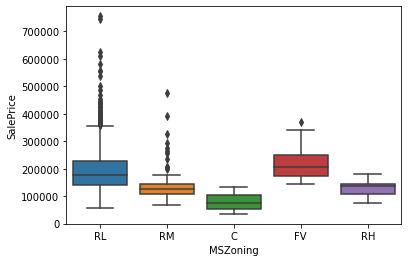

In [126]:
# Box plot MSZoning and SalePrice
sns.boxplot(x = housepricedata.MSZoning, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

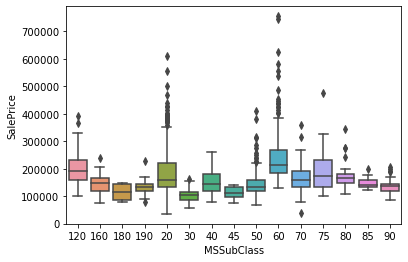

In [127]:
# Box plot MSSubClass and SalePrice
sns.boxplot(x = housepricedata.MSSubClass, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

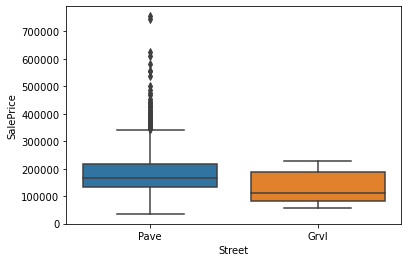

In [128]:
# Box plot Street and SalePrice
sns.boxplot(x = housepricedata.Street, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

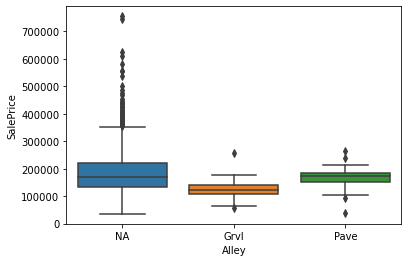

In [129]:
# Box plot Alley and SalePrice
sns.boxplot(x = housepricedata.Alley, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

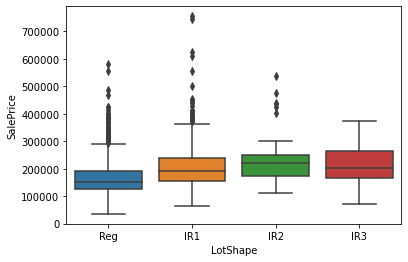

In [130]:
# Box plot LotShape and SalePrice
sns.boxplot(x = housepricedata.LotShape, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

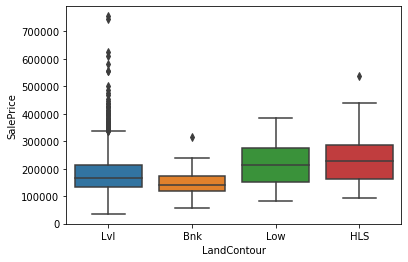

In [131]:
# Box plot LandContour and SalePrice
sns.boxplot(x = housepricedata.LandContour, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

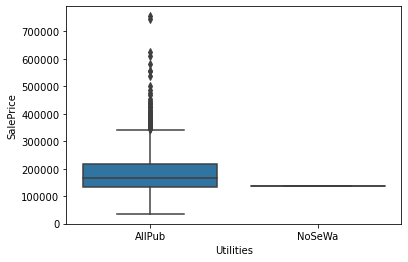

In [132]:
# Box plot Utilities and SalePrice
sns.boxplot(x = housepricedata.Utilities, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

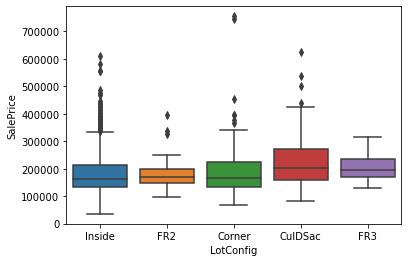

In [133]:
# Box plot LotConfig and SalePrice
sns.boxplot(x = housepricedata.LotConfig, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

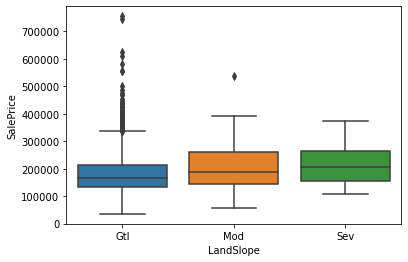

In [134]:
# Box plot LandSlope and SalePrice
sns.boxplot(x = housepricedata.LandSlope, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

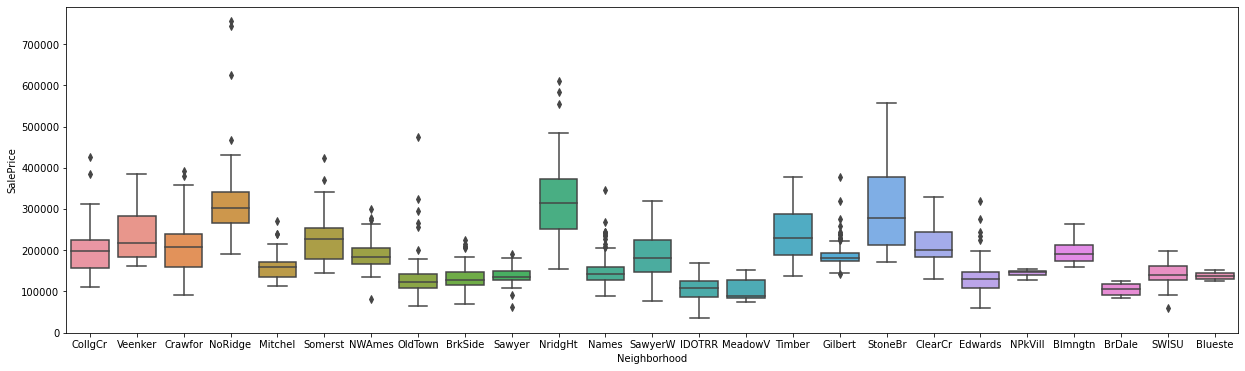

In [135]:
# Box plot Neighborhood and SalePrice
plt.figure(figsize=[21,6])
sns.boxplot(x = housepricedata.Neighborhood, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

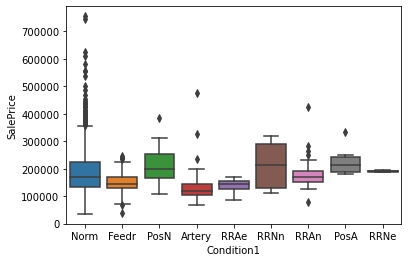

In [136]:
# Box plot Condition1 and SalePrice
sns.boxplot(x = housepricedata.Condition1, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

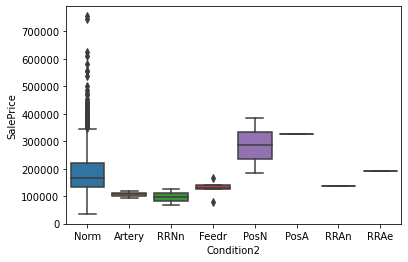

In [137]:
# Box plot Condition2 and SalePrice
sns.boxplot(x = housepricedata.Condition2, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

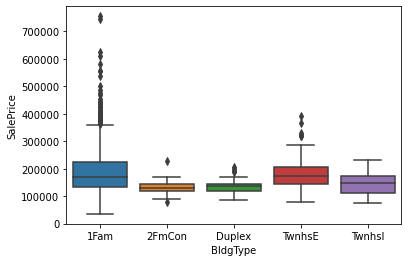

In [138]:
# Box plot BldgType and SalePrice
sns.boxplot(x = housepricedata.BldgType, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

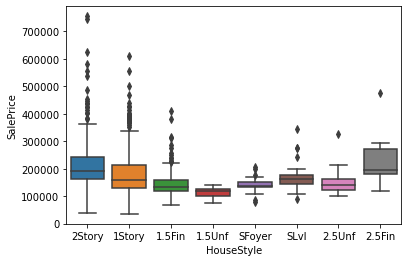

In [139]:
# Box plot HouseStyle and SalePrice
sns.boxplot(x = housepricedata.HouseStyle, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

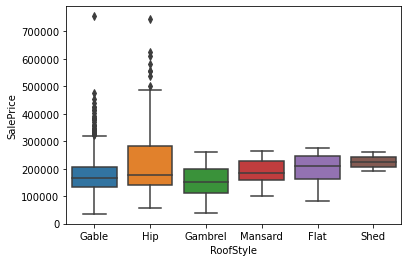

In [140]:
# Box plot RoofStyle and SalePrice
sns.boxplot(x = housepricedata.RoofStyle, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

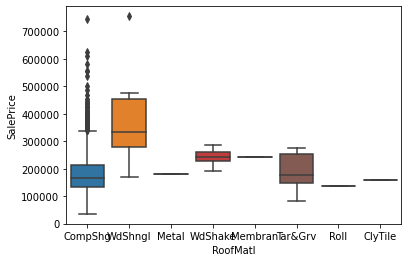

In [141]:
# Box plot RoofMatl and SalePrice
sns.boxplot(x = housepricedata.RoofMatl, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

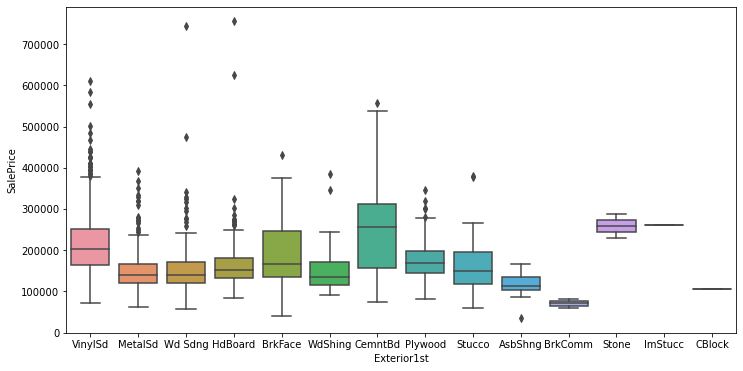

In [142]:
# Box plot Exterior1st and SalePrice
plt.figure(figsize=[12,6])
sns.boxplot(x = housepricedata.Exterior1st, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

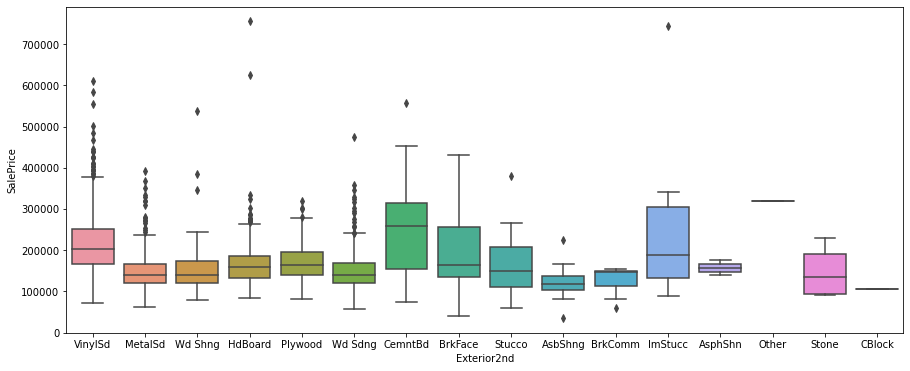

In [143]:
# Box plot Exterior2nd and SalePrice
plt.figure(figsize=[15,6])
sns.boxplot(x = housepricedata.Exterior2nd, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

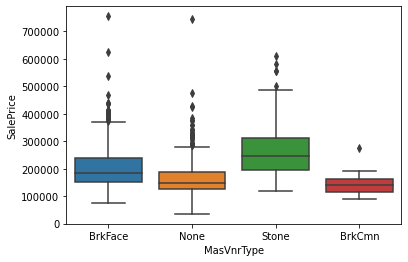

In [144]:
# Box plot MasVnrType and SalePrice
sns.boxplot(x = housepricedata.MasVnrType, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

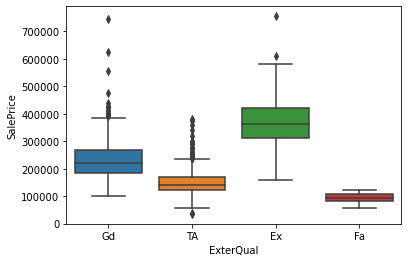

In [145]:
# Box plot ExterQual and SalePrice
sns.boxplot(x = housepricedata.ExterQual, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

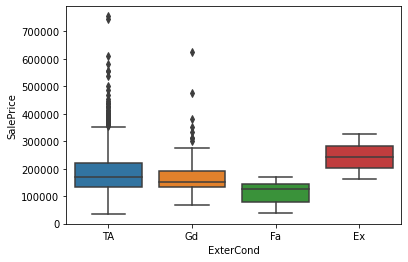

In [146]:
# Box plot ExterCond and SalePrice
sns.boxplot(x = housepricedata.ExterCond, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

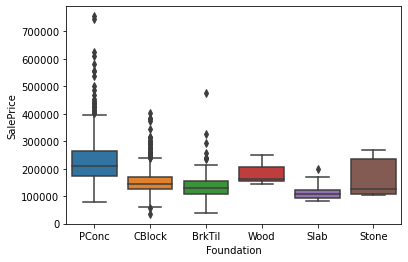

In [147]:
# Box plot Foundation and SalePrice
sns.boxplot(x = housepricedata.Foundation, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

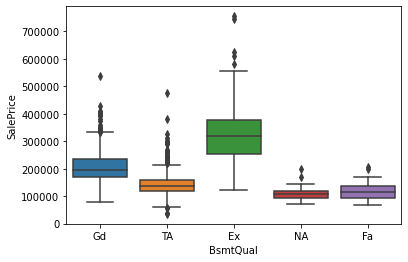

In [148]:
# Box plot BsmtQual and SalePrice
sns.boxplot(x = housepricedata.BsmtQual, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

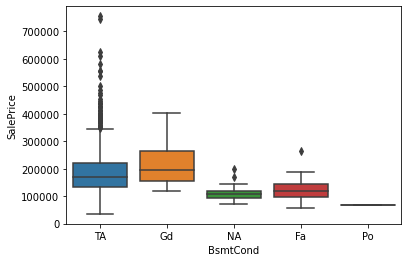

In [149]:
# Box plot BsmtCond and SalePrice
sns.boxplot(x = housepricedata.BsmtCond, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

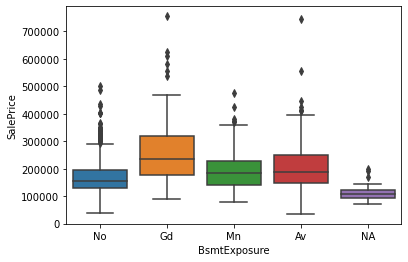

In [150]:
# Box plot BsmtExposure and SalePrice
sns.boxplot(x = housepricedata.BsmtExposure, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

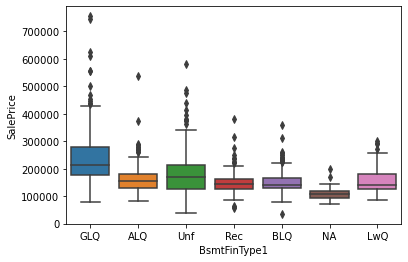

In [151]:
# Box plot BsmtFinType1 and SalePrice
sns.boxplot(x = housepricedata.BsmtFinType1, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

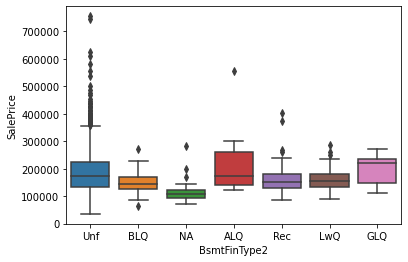

In [152]:
# Box plot BsmtFinType2 and SalePrice
sns.boxplot(x = housepricedata.BsmtFinType2, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

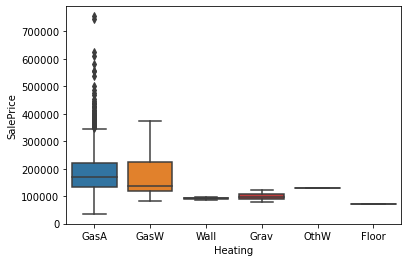

In [153]:
# Box plot Heating and SalePrice
sns.boxplot(x = housepricedata.Heating, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

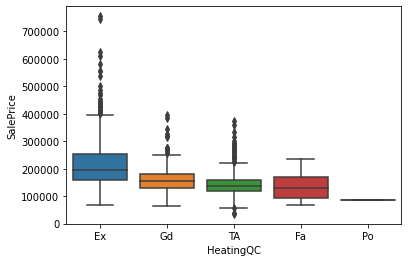

In [154]:
# Box plot HeatingQC and SalePrice
sns.boxplot(x = housepricedata.HeatingQC, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

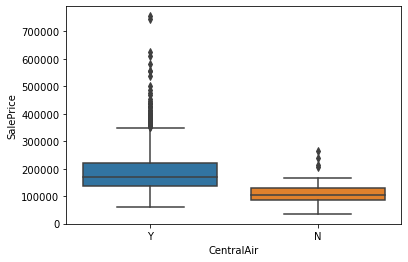

In [155]:
# Box plot CentralAir and SalePrice
sns.boxplot(x = housepricedata.CentralAir, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

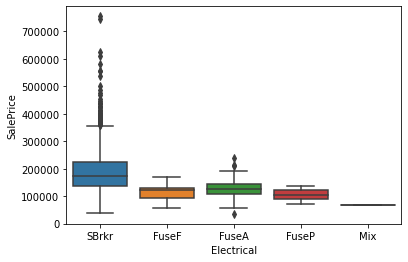

In [156]:
# Box plot Electrical and SalePrice
sns.boxplot(x = housepricedata.Electrical, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

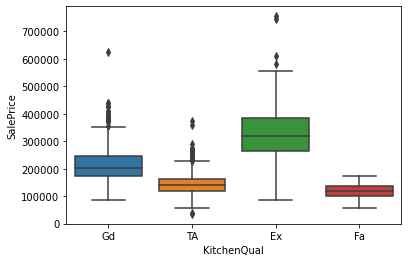

In [157]:
# Box plot KitchenQual and SalePrice
sns.boxplot(x = housepricedata.KitchenQual, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

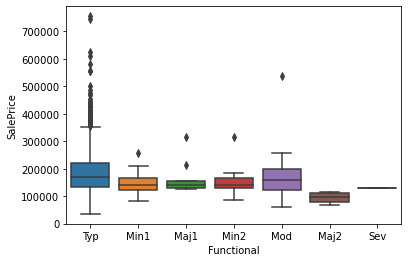

In [158]:
# Box plot Functional and SalePrice
sns.boxplot(x = housepricedata.Functional, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

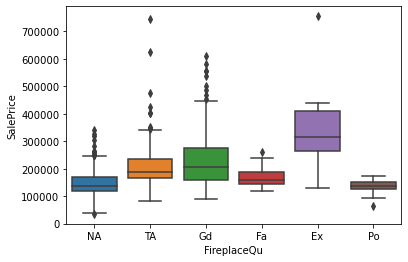

In [159]:
# Box plot FireplaceQu and SalePrice
sns.boxplot(x = housepricedata.FireplaceQu, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

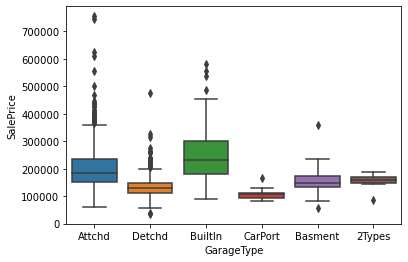

In [160]:
# Box plot GarageType and SalePrice
sns.boxplot(x = housepricedata.GarageType, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

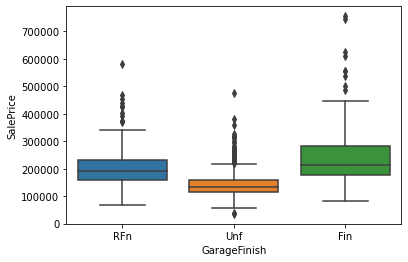

In [161]:
# Box plot GarageFinish and SalePrice
sns.boxplot(x = housepricedata.GarageFinish, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

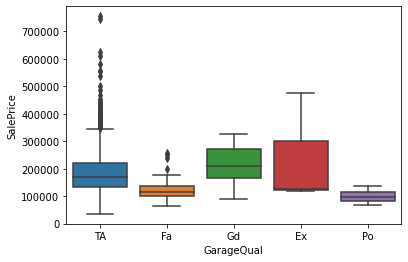

In [162]:
# Box plot GarageQual and SalePrice
sns.boxplot(x = housepricedata.GarageQual, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

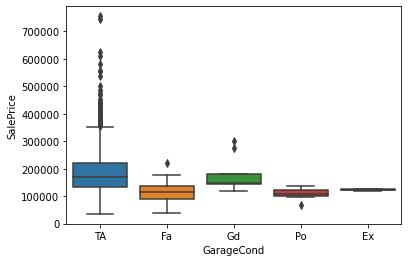

In [163]:
# Box plot GarageCond and SalePrice
sns.boxplot(x = housepricedata.GarageCond, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

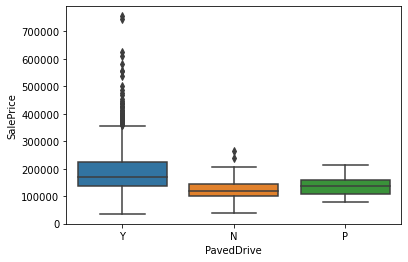

In [164]:
# Box plot PavedDrive and SalePrice
sns.boxplot(x = housepricedata.PavedDrive, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

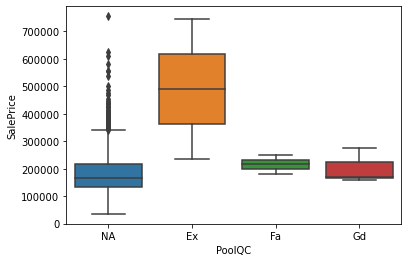

In [165]:
# Box plot PoolQC and SalePrice
sns.boxplot(x = housepricedata.PoolQC, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

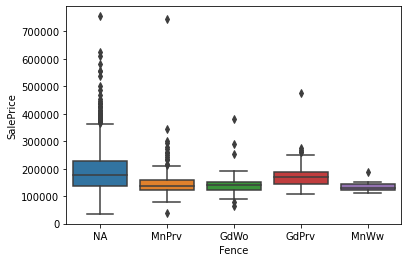

In [166]:
# Box plot Fence and SalePrice
sns.boxplot(x = housepricedata.Fence, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

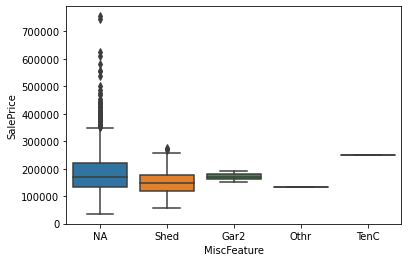

In [167]:
# Box plot MiscFeature and SalePrice
sns.boxplot(x = housepricedata.MiscFeature, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

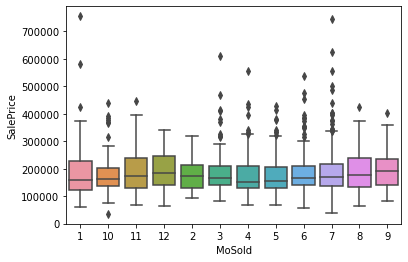

In [168]:
# Box plot MoSold and SalePrice
sns.boxplot(x = housepricedata.MoSold, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

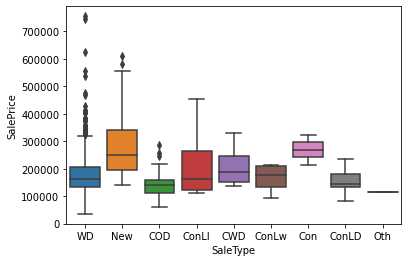

In [169]:
# Box plot SaleType and SalePrice
sns.boxplot(x = housepricedata.SaleType, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

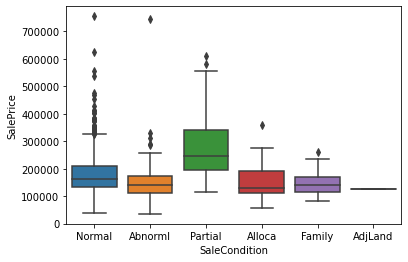

In [170]:
# Box plot SaleCondition and SalePrice
sns.boxplot(x = housepricedata.SaleCondition, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

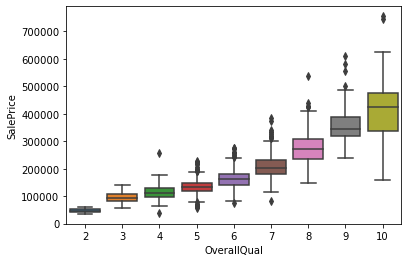

In [171]:
# Box plot OverallQual and SalePrice
sns.boxplot(x = housepricedata.OverallQual, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

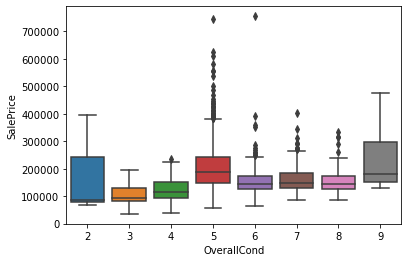

In [172]:
# Box plot OverallCond and SalePrice
sns.boxplot(x = housepricedata.OverallCond, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

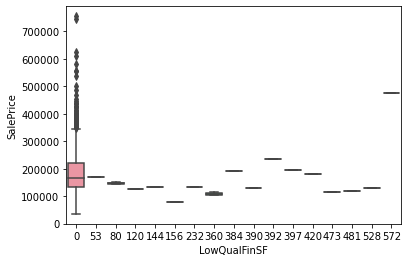

In [173]:
# Box plot LowQualFinSF and SalePrice
sns.boxplot(x = housepricedata.LowQualFinSF, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

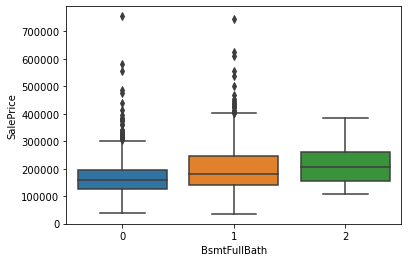

In [174]:
# Box plot BsmtFullBath and SalePrice
sns.boxplot(x = housepricedata.BsmtFullBath, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

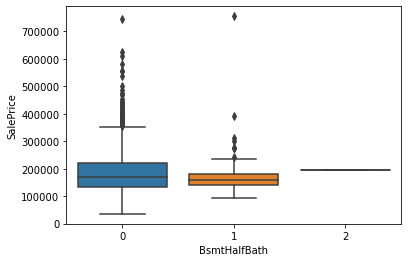

In [175]:
# Box plot BsmtHalfBath and SalePrice
sns.boxplot(x = housepricedata.BsmtHalfBath, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

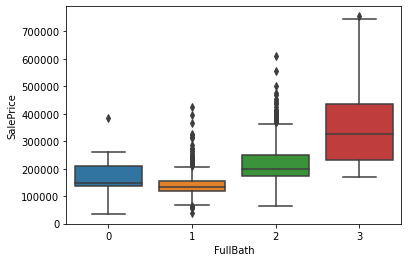

In [176]:
# Box plot FullBath and SalePrice
sns.boxplot(x = housepricedata.FullBath, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

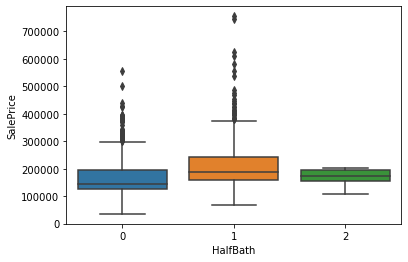

In [177]:
# Box plot HalfBath and SalePrice
sns.boxplot(x = housepricedata.HalfBath, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

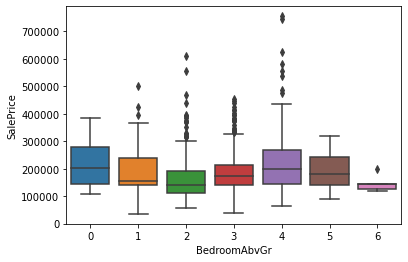

In [178]:
# Box plot BedroomAbvGr and SalePrice
sns.boxplot(x = housepricedata.BedroomAbvGr, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

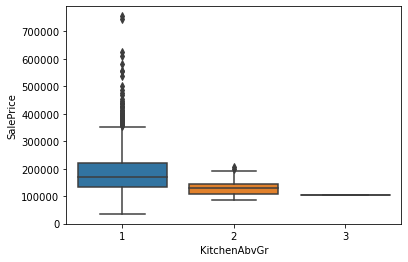

In [179]:
# Box plot KitchenAbvGr and SalePrice
sns.boxplot(x = housepricedata.KitchenAbvGr, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

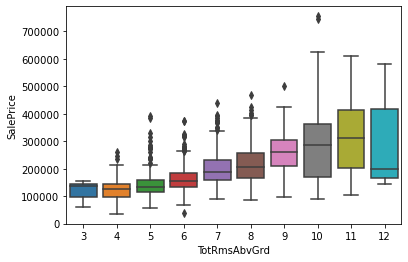

In [180]:
# Box plot TotRmsAbvGrd and SalePrice
sns.boxplot(x = housepricedata.TotRmsAbvGrd, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

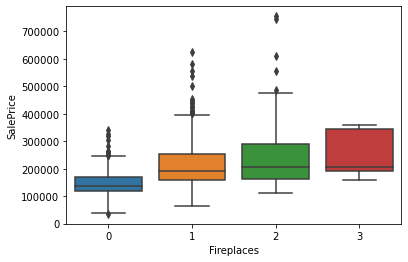

In [181]:
# Box plot Fireplaces and SalePrice
sns.boxplot(x = housepricedata.Fireplaces, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

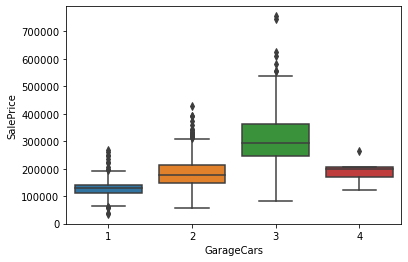

In [182]:
# Box plot GarageCars and SalePrice
sns.boxplot(x = housepricedata.GarageCars, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

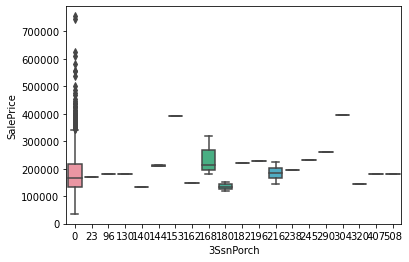

In [183]:
# Box plot 3SsnPorch and SalePrice
sns.boxplot(x = housepricedata['3SsnPorch'], y = housepricedata.SalePrice, data = housepricedata)
plt.show()

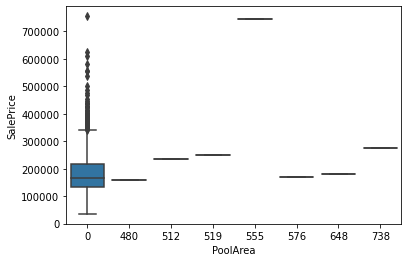

In [184]:
# Box plot PoolArea and SalePrice
sns.boxplot(x = housepricedata.PoolArea, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

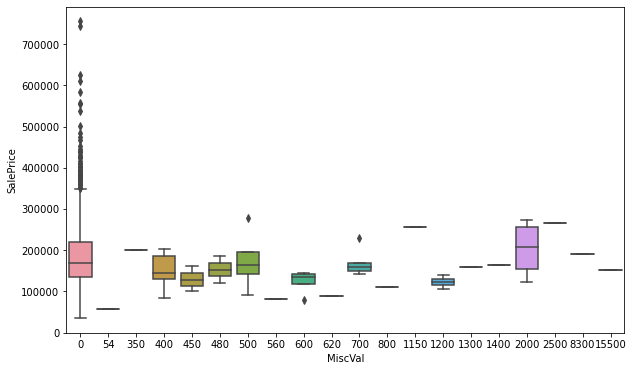

In [185]:
# Box plot MiscVal and SalePrice
plt.figure(figsize=[10,6])
sns.boxplot(x = housepricedata.MiscVal, y = housepricedata.SalePrice, data = housepricedata)
plt.show()

#### The range chosen for TotalYearsBuilt is
Range 1 - upto 14 <br />
Range 2 - from 15 to 28 <br />
Range 3 - from 29 to 42 <br />
Range 4 - from 43 to 56 <br />
Range 5 - from 57 to 70 <br />
Range 6 - from 71 to 84 <br />
Range 7 - from 85 to 98 <br />
Range 8 - from 99 to 112 <br />
Range 9 - from 113 to 126 <br />
Range 10 - from 127 to 140 <br />

In [186]:
# TotalYearsBuilt max value
housepricedata.TotalYearsBuilt.max()

140

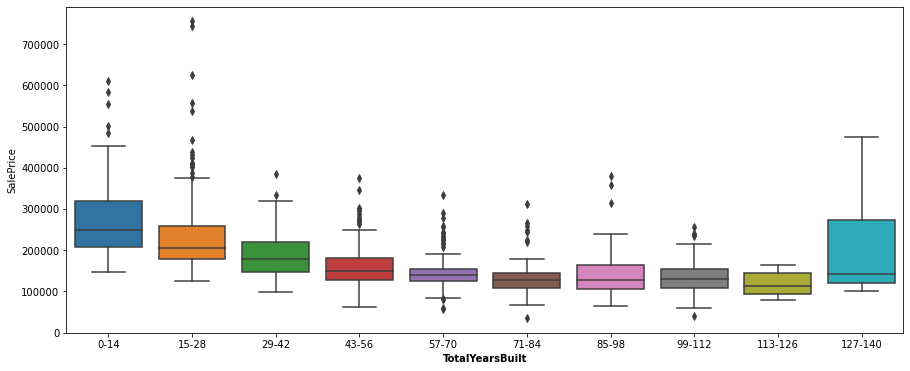

In [187]:
# Box plot of TotalYearsBuilt and SalePrice
plt.figure(figsize=[15,6])

box_plot_data = np.nan

# Assigning Range1
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 0) & (housepricedata['TotalYearsBuilt'] <= 14),'0-14',box_plot_data)

# Assigning Range2
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 15) & (housepricedata['TotalYearsBuilt'] <= 28),'15-28',box_plot_data)

# Assigning Range3
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 29) & (housepricedata['TotalYearsBuilt'] <= 42),'29-42',box_plot_data)

# Assigning Range4
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 43) & (housepricedata['TotalYearsBuilt'] <= 56),'43-56',box_plot_data)

# Assigning Range5
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 57) & (housepricedata['TotalYearsBuilt'] <= 70),'57-70',box_plot_data)

# Assigning Range6
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 71) & (housepricedata['TotalYearsBuilt'] <= 84),'71-84',box_plot_data)

# Assigning Range7
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 85) & (housepricedata['TotalYearsBuilt'] <= 98),'85-98',box_plot_data)

# Assigning Range8
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 99) & (housepricedata['TotalYearsBuilt'] <= 112),'99-112',box_plot_data)

# Assigning Range9
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 113) & (housepricedata['TotalYearsBuilt'] <= 126),'113-126',box_plot_data)

# Assigning Range10
box_plot_data = np.where((housepricedata['TotalYearsBuilt'] >= 127) & (housepricedata['TotalYearsBuilt'] <= 140),'127-140',box_plot_data)

sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["0-14", "15-28","29-42","43-56","57-70","71-84","85-98","99-112","113-126","127-140"])
plt.xlabel('TotalYearsBuilt', fontweight ='bold')
plt.show()

#### The range chosen for TotalYearsRemodAdd is
Range 1 - upto 14 <br />
Range 2 - from 15 to 28 <br />
Range 3 - from 29 to 42 <br />
Range 4 - from 43 to 56 <br />
Range 5 - from 57 to 70 <br />

In [188]:
# TotalYearsRemodAdd max value
housepricedata.TotalYearsRemodAdd.max()

70

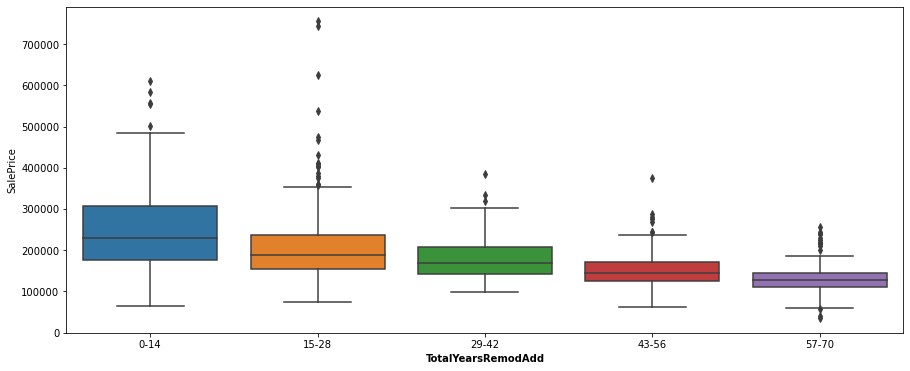

In [189]:
# Box plot of TotalYearsRemodAdd and SalePrice
plt.figure(figsize=[15,6])

box_plot_data = np.nan

# Assigning Range1
box_plot_data = np.where((housepricedata['TotalYearsRemodAdd'] >= 0) & (housepricedata['TotalYearsRemodAdd'] <= 14),'0-14',box_plot_data)

# Assigning Range2
box_plot_data = np.where((housepricedata['TotalYearsRemodAdd'] >= 15) & (housepricedata['TotalYearsRemodAdd'] <= 28),'15-28',box_plot_data)

# Assigning Range3
box_plot_data = np.where((housepricedata['TotalYearsRemodAdd'] >= 29) & (housepricedata['TotalYearsRemodAdd'] <= 42),'29-42',box_plot_data)

# Assigning Range4
box_plot_data = np.where((housepricedata['TotalYearsRemodAdd'] >= 43) & (housepricedata['TotalYearsRemodAdd'] <= 56),'43-56',box_plot_data)

# Assigning Range5
box_plot_data = np.where((housepricedata['TotalYearsRemodAdd'] >= 57) & (housepricedata['TotalYearsRemodAdd'] <= 70),'57-70',box_plot_data)

sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["0-14", "15-28","29-42","43-56","57-70"])
plt.xlabel('TotalYearsRemodAdd', fontweight ='bold')
plt.show()

#### The range chosen for TotalYearsGarageBlt is
Range 1 - from 0 to 20 <br />
Range 2 - from 21 to 40 <br />
Range 3 - from 41 to 60 <br />
Range 4 - from 61 to 80 <br />
Range 5 - from 81 to 100 <br />
Range 6 - from 101 to 120 <br />

In [190]:
# TotalYearsGarageBlt max value
housepricedata.TotalYearsGarageBlt.max()

120

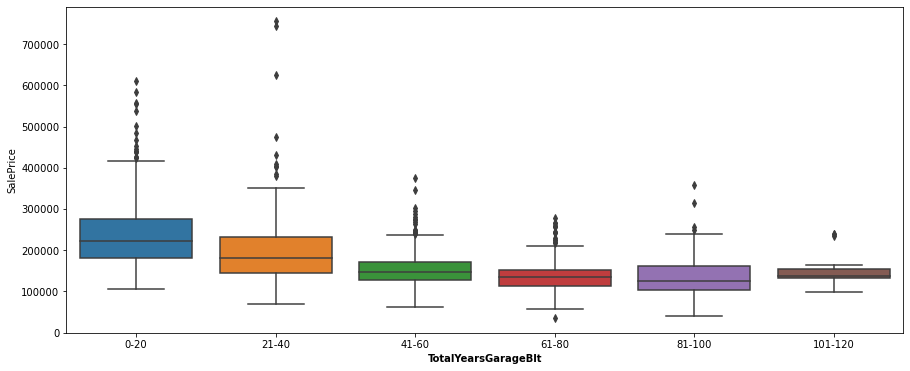

In [191]:
# Box plot of TotalYearsGarageBlt and SalePrice
plt.figure(figsize=[15,6])

box_plot_data = np.nan

# Assigning Range1
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] >= 0) & (housepricedata['TotalYearsGarageBlt'] <= 20),'0-20',box_plot_data)

# Assigning Range2
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] > 21) & (housepricedata['TotalYearsGarageBlt'] <= 40),'21-40',box_plot_data)

# Assigning Range3
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] > 41) & (housepricedata['TotalYearsGarageBlt'] <= 60),'41-60',box_plot_data)

# Assigning Range4
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] > 61) & (housepricedata['TotalYearsGarageBlt'] <= 80),'61-80',box_plot_data)

# Assigning Range5
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] > 81) & (housepricedata['TotalYearsGarageBlt'] <= 100),'81-100',box_plot_data)

# Assigning Range6
box_plot_data = np.where((housepricedata['TotalYearsGarageBlt'] > 101) & (housepricedata['TotalYearsGarageBlt'] <= 120),'101-120',box_plot_data)

sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["0-20","21-40","41-60","61-80","81-100","101-120"])
plt.xlabel('TotalYearsGarageBlt', fontweight ='bold')
plt.show()

#### The range chosen for TotalYearsLastSold is
Range 1 - 10 <br />
Range 2 - 11 <br />
Range 3 - 12 <br />
Range 4 - 13 <br />
Range 5 - 14 <br />

In [192]:
# TotalYearsLastSold min value
housepricedata.TotalYearsLastSold.min()

10

In [193]:
# TotalYearsLastSold max value
housepricedata.TotalYearsLastSold.max()

14

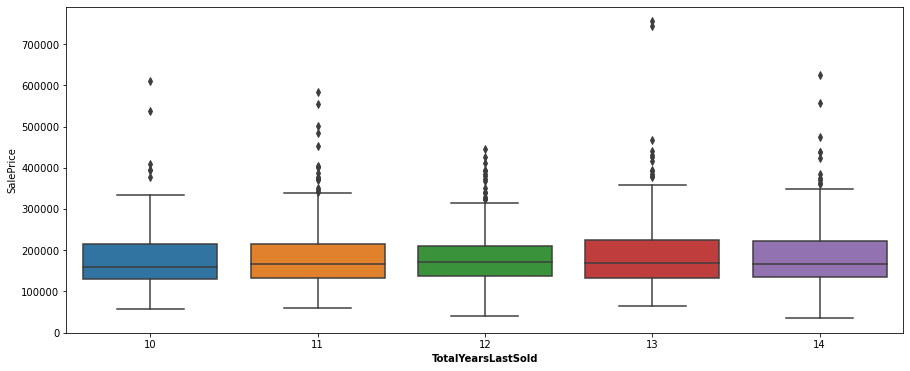

In [194]:
# Box plot of TotalYearsLastSold and SalePrice
plt.figure(figsize=[15,6])

box_plot_data = np.nan

# Assigning Range1
box_plot_data = np.where((housepricedata['TotalYearsLastSold'] == 10),'10',box_plot_data)

# Assigning Range2
box_plot_data = np.where((housepricedata['TotalYearsLastSold'] == 11),'11',box_plot_data)

# Assigning Range3
box_plot_data = np.where((housepricedata['TotalYearsLastSold'] == 12),'12',box_plot_data)

# Assigning Range4
box_plot_data = np.where((housepricedata['TotalYearsLastSold'] == 13),'13',box_plot_data)

# Assigning Range5
box_plot_data = np.where((housepricedata['TotalYearsLastSold'] == 14),'14',box_plot_data)

sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["10","11","12","13","14"])
plt.xlabel('TotalYearsLastSold', fontweight ='bold')
plt.show()

#### The range chosen for LotFrontage is
1) low - upto 60 <br />
2) Medium - from 60 upto 70 <br />
3) Medium-High - from 70 upto 80 <br />
4) High - above 80 <br />

In [195]:
housepricedata.LotFrontage.describe()

count    1370.000000
mean       70.359854
std        21.958584
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

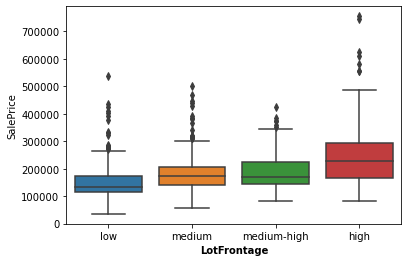

In [196]:
# Box plot of LotFrontage and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for LotFrontage <= 60
box_plot_data = np.where((housepricedata['LotFrontage'] <= 60),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for LotFrontage > 60 and LotFrontage <= 70
box_plot_data = np.where((housepricedata['LotFrontage'] > 60) & (housepricedata['LotFrontage'] <= 70),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for LotFrontage > 70 and LotFrontage <= 80
box_plot_data = np.where((housepricedata['LotFrontage'] > 70) & (housepricedata['LotFrontage'] <= 80),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for LotFrontage > 80
box_plot_data = np.where((housepricedata['LotFrontage'] > 80),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('LotFrontage', fontweight ='bold')
plt.show()

#### The range chosen for LotArea is
1) low - upto 7590 <br />
2) Medium - from 7590 upto 9399 <br />
3) Medium-High - from 9399 upto 11361 <br />
4) High - above 11361 <br />

In [197]:
housepricedata.LotArea.describe()

count      1370.000000
mean      10687.435036
std       10228.507006
min        1300.000000
25%        7731.000000
50%        9591.000000
75%       11712.750000
max      215245.000000
Name: LotArea, dtype: float64

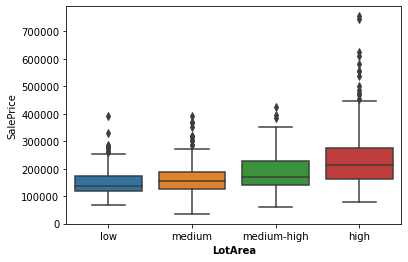

In [198]:
# Box plot of LotArea and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for LotArea <= 7590
box_plot_data = np.where((housepricedata['LotArea'] <= 7590),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for LotArea > 7590 and LotArea <= 9399
box_plot_data = np.where((housepricedata['LotArea'] > 7590) & (housepricedata['LotArea'] <= 9399),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for LotArea > 9399 and LotArea <= 11361
box_plot_data = np.where((housepricedata['LotArea'] > 9399) & (housepricedata['LotArea'] <= 11361),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for LotArea > 11361
box_plot_data = np.where((housepricedata['LotArea'] > 11361),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('LotArea', fontweight ='bold')
plt.show()

#### The range chosen for MasVnrArea is
1) low - 0 <br />
2) Medium - from 0 upto 170 <br />
3) High - above 170 <br />

In [199]:
housepricedata.MasVnrArea.describe()

count    1370.000000
mean      109.076642
std       184.589326
min         0.000000
25%         0.000000
50%         0.000000
75%       171.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

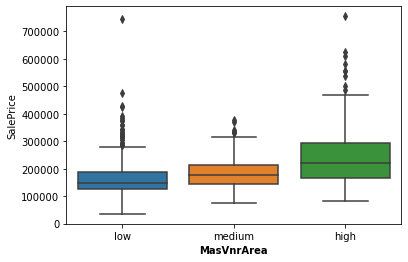

In [200]:
# Box plot of MasVnrArea and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for MasVnrArea = 0
box_plot_data = np.where((housepricedata['MasVnrArea'] == 0),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for MasVnrArea > 0 and MasVnrArea <= 170
box_plot_data = np.where((housepricedata['MasVnrArea'] > 0) & (housepricedata['MasVnrArea'] <= 170),'medium',box_plot_data)

# Assigning calue as 'high' to box_plot_data for MasVnrArea > 170
box_plot_data = np.where((housepricedata['MasVnrArea'] > 170),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","high"])
plt.xlabel('MasVnrArea', fontweight ='bold')
plt.show()

#### The range chosen for BsmtFinSF1 is
1) low - upto 0 <br />
2) Medium - from 0 upto 374 <br />
3) Medium-High - from 374 upto 702 <br />
4) High - above 702 <br />

In [201]:
housepricedata.BsmtFinSF1.describe()

count    1370.000000
mean      454.211679
std       458.985739
min         0.000000
25%         0.000000
50%       399.500000
75%       728.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

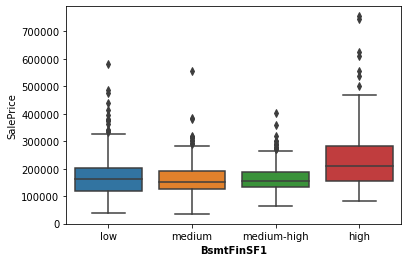

In [202]:
# Box plot of BsmtFinSF1 and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for BsmtFinSF1 = 0
box_plot_data = np.where((housepricedata['BsmtFinSF1'] == 0),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for BsmtFinSF1 > 0 and BsmtFinSF1 <= 374
box_plot_data = np.where((housepricedata['BsmtFinSF1'] > 0) & (housepricedata['BsmtFinSF1'] <= 374),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for BsmtFinSF1 > 374 and BsmtFinSF1 <= 702
box_plot_data = np.where((housepricedata['BsmtFinSF1'] > 374) & (housepricedata['BsmtFinSF1'] <= 702),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for BsmtFinSF1 > 702
box_plot_data = np.where((housepricedata['BsmtFinSF1'] > 702),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('BsmtFinSF1', fontweight ='bold')
plt.show()

#### The range chosen for BsmtFinSF2 is
1) low - 0 <br />
2) High - above 0 <br />

In [203]:
housepricedata.BsmtFinSF2.describe()

count    1370.000000
mean       48.418248
std       164.817484
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

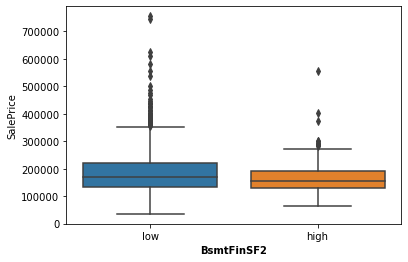

In [204]:
# Box plot of BsmtFinSF2 and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for BsmtFinSF2 = 0
box_plot_data = np.where((housepricedata['BsmtFinSF2'] == 0),'low',box_plot_data)

# Assigning calue as 'high' to box_plot_data for BsmtFinSF2 > 0
box_plot_data = np.where((housepricedata['BsmtFinSF2'] > 0),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","high"])
plt.xlabel('BsmtFinSF2', fontweight ='bold')
plt.show()

#### The range chosen for BsmtUnfSF is
1) low - upto 249 <br />
2) Medium - from 249 upto 506 <br />
3) Medium-High - from 506 upto 840 <br />
4) High - above 840 <br />

In [205]:
housepricedata.BsmtUnfSF.describe()

count    1370.000000
mean      570.742336
std       444.050989
min         0.000000
25%       225.500000
50%       477.500000
75%       811.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

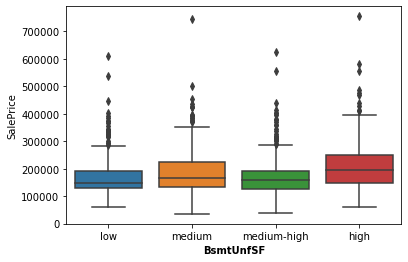

In [206]:
# Box plot of BsmtUnfSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for BsmtUnfSF <= 249
box_plot_data = np.where((housepricedata['BsmtUnfSF'] <= 249),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for BsmtUnfSF > 249 and BsmtUnfSF <= 506
box_plot_data = np.where((housepricedata['BsmtUnfSF'] > 249) & (housepricedata['BsmtUnfSF'] <= 506),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for BsmtUnfSF > 506 and BsmtUnfSF <= 840
box_plot_data = np.where((housepricedata['BsmtUnfSF'] > 506) & (housepricedata['BsmtUnfSF'] <= 840),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for BsmtUnfSF > 840
box_plot_data = np.where((housepricedata['BsmtUnfSF'] > 840),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('BsmtUnfSF', fontweight ='bold')
plt.show()

#### The range chosen for TotalBsmtSF is
1) low - upto 803 <br />
2) Medium - from 803 upto 1008 <br />
3) Medium-High - from 1008 upto 1327 <br />
4) High - above 1327 <br />

In [207]:
housepricedata.TotalBsmtSF.describe()

count    1370.000000
mean     1073.372263
std       435.558797
min         0.000000
25%       808.500000
50%      1008.000000
75%      1314.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

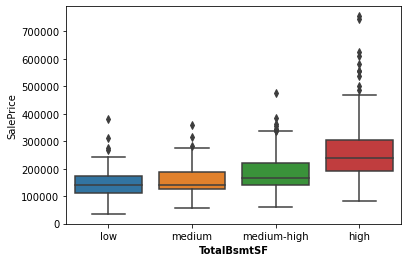

In [208]:
# Box plot of TotalBsmtSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for TotalBsmtSF <= 803
box_plot_data = np.where((housepricedata['TotalBsmtSF'] <= 803),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for TotalBsmtSF > 803 and TotalBsmtSF <= 1008
box_plot_data = np.where((housepricedata['TotalBsmtSF'] > 803) & (housepricedata['TotalBsmtSF'] <= 1008),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for TotalBsmtSF > 1008 and TotalBsmtSF <= 1327
box_plot_data = np.where((housepricedata['TotalBsmtSF'] > 1008) & (housepricedata['TotalBsmtSF'] <= 1327),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for TotalBsmtSF > 1327
box_plot_data = np.where((housepricedata['TotalBsmtSF'] > 1327),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('TotalBsmtSF', fontweight ='bold')
plt.show()

#### The range chosen for 1stFlrSF is
1) low - upto 894 <br />
2) Medium - from 894 upto 1097 <br />
3) Medium-High - from 1097 upto 1411 <br />
4) High - above 1411 <br />

In [209]:
housepricedata['1stFlrSF'].describe()

count    1370.000000
mean     1176.086131
std       385.381717
min       438.000000
25%       894.000000
50%      1098.000000
75%      1414.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

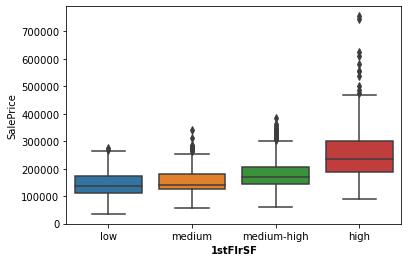

In [210]:
# Box plot of 1stFlrSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for 1stFlrSF <= 894
box_plot_data = np.where((housepricedata['1stFlrSF'] <= 894),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for 1stFlrSF > 894 and 1stFlrSF <= 1097
box_plot_data = np.where((housepricedata['1stFlrSF'] > 894) & (housepricedata['1stFlrSF'] <= 1097),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for 1stFlrSF > 1097 and 1stFlrSF <= 1411
box_plot_data = np.where((housepricedata['1stFlrSF'] > 1097) & (housepricedata['1stFlrSF'] <= 1411),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for 1stFlrSF > 1411
box_plot_data = np.where((housepricedata['1stFlrSF'] > 1411),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('1stFlrSF', fontweight ='bold')
plt.show()

#### The range chosen for 2ndFlrSF is
1) low - 0 <br />
2) Medium - from 0 upto 728 <br />
3) High - above 728 <br />

In [211]:
housepricedata['2ndFlrSF'].describe()

count    1370.000000
mean      353.202190
std       439.497524
min         0.000000
25%         0.000000
50%         0.000000
75%       737.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

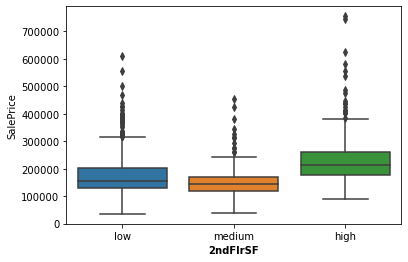

In [212]:
# Box plot of 2ndFlrSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for 2ndFlrSF = 0
box_plot_data = np.where((housepricedata['2ndFlrSF'] == 0),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for 2ndFlrSF > 0 and 2ndFlrSF <= 728
box_plot_data = np.where((housepricedata['2ndFlrSF'] > 0) & (housepricedata['2ndFlrSF'] <= 728),'medium',box_plot_data)

# Assigning calue as 'high' to box_plot_data for 2ndFlrSF > 728
box_plot_data = np.where((housepricedata['2ndFlrSF'] > 728),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","high"])
plt.xlabel('2ndFlrSF', fontweight ='bold')
plt.show()

#### The range chosen for GrLivArea is
1) low - upto 1154 <br />
2) Medium - from 1154 upto 1479 <br />
3) Medium-High - from 1479 upto 1776 <br />
4) High - above 1776 <br />

In [213]:
housepricedata.GrLivArea.describe()

count    1370.000000
mean     1533.450365
std       519.489200
min       438.000000
25%      1152.000000
50%      1479.000000
75%      1788.000000
max      5642.000000
Name: GrLivArea, dtype: float64

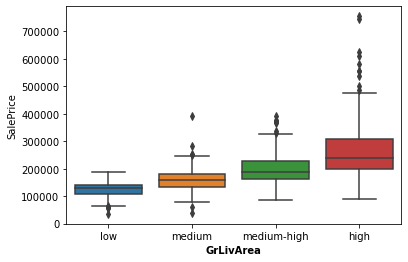

In [214]:
# Box plot of GrLivArea and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for GrLivArea <= 1154
box_plot_data = np.where((housepricedata['GrLivArea'] <= 1154),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for GrLivArea > 1154 and GrLivArea <= 1479
box_plot_data = np.where((housepricedata['GrLivArea'] > 1154) & (housepricedata['GrLivArea'] <= 1479),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for GrLivArea > 1479 and GrLivArea <= 1776
box_plot_data = np.where((housepricedata['GrLivArea'] > 1479) & (housepricedata['GrLivArea'] <= 1776),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for GrLivArea > 1776
box_plot_data = np.where((housepricedata['GrLivArea'] > 1776),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('GrLivArea', fontweight ='bold')
plt.show()

#### The range chosen for GarageArea is
1) low - upto 360 <br />
2) Medium - from 360 upto 484 <br />
3) Medium-High - from 484 upto 600 <br />
4) High - above 600 <br />

In [215]:
housepricedata.GarageArea.describe()

count    1370.000000
mean      500.462774
std       185.988074
min       160.000000
25%       377.500000
50%       484.000000
75%       582.750000
max      1418.000000
Name: GarageArea, dtype: float64

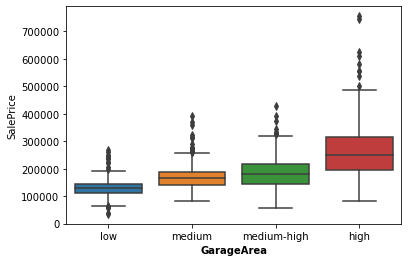

In [216]:
# Box plot of GarageArea and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for GarageArea <= 360
box_plot_data = np.where((housepricedata['GarageArea'] <= 360),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for GarageArea > 360 and GarageArea <= 484
box_plot_data = np.where((housepricedata['GarageArea'] > 360) & (housepricedata['GarageArea'] <= 484),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for GarageArea > 484 and GarageArea <= 600
box_plot_data = np.where((housepricedata['GarageArea'] > 484) & (housepricedata['GarageArea'] <= 600),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for GarageArea > 600
box_plot_data = np.where((housepricedata['GarageArea'] > 600),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('GarageArea', fontweight ='bold')
plt.show()

#### The range chosen for WoodDeckSF is
1) low - 0 <br />
2) Medium - from 0 upto 168 <br />
3) High - above 168 <br />

In [217]:
housepricedata.WoodDeckSF.describe()

count    1370.000000
mean       97.656204
std       126.805998
min         0.000000
25%         0.000000
50%         0.000000
75%       171.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

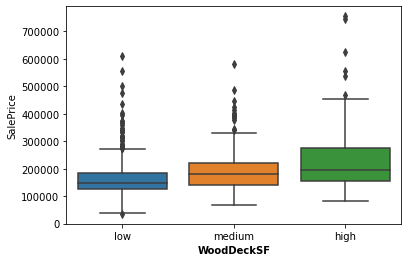

In [218]:
# Box plot of WoodDeckSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for WoodDeckSF = 0
box_plot_data = np.where((housepricedata['WoodDeckSF'] == 0),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for WoodDeckSF > 0 and WoodDeckSF <= 168
box_plot_data = np.where((housepricedata['WoodDeckSF'] > 0) & (housepricedata['WoodDeckSF'] <= 168),'medium',box_plot_data)

# Assigning calue as 'high' to box_plot_data for WoodDeckSF > 168
box_plot_data = np.where((housepricedata['WoodDeckSF'] > 168),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","high"])
plt.xlabel('WoodDeckSF', fontweight ='bold')
plt.show()

#### The range chosen for OpenPorchSF is
1) low - 0 <br />
2) Medium - from 0 upto 27 <br />
3) Medium-High - from 27 upto 68 <br />
4) High - above 68 <br />

In [219]:
housepricedata.OpenPorchSF.describe()

count    1370.000000
mean       47.028467
std        64.995049
min         0.000000
25%         0.000000
50%        27.000000
75%        69.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

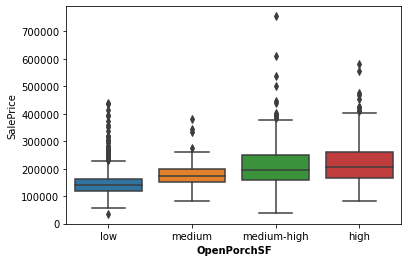

In [220]:
# Box plot of OpenPorchSF and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for OpenPorchSF = 0
box_plot_data = np.where((housepricedata['OpenPorchSF'] == 0),'low',box_plot_data)

# Assigning calue as 'medium' to box_plot_data for OpenPorchSF > 0 and OpenPorchSF <= 27
box_plot_data = np.where((housepricedata['OpenPorchSF'] > 0) & (housepricedata['OpenPorchSF'] <= 27),'medium',box_plot_data)

# Assigning calue as 'medium-high' to box_plot_data for OpenPorchSF > 27 and OpenPorchSF <= 68
box_plot_data = np.where((housepricedata['OpenPorchSF'] > 27) & (housepricedata['OpenPorchSF'] <= 68),'medium-high',box_plot_data)

# Assigning calue as 'high' to box_plot_data for OpenPorchSF > 68
box_plot_data = np.where((housepricedata['OpenPorchSF'] > 80),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","medium","medium-high","high"])
plt.xlabel('OpenPorchSF', fontweight ='bold')
plt.show()

#### The range chosen for EnclosedPorch is
1) low - 0 <br />
2) High - above 0 <br />

In [221]:
housepricedata.EnclosedPorch.describe()

count    1370.000000
mean       21.031387
std        60.519492
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

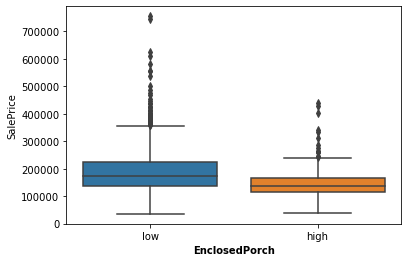

In [222]:
# Box plot of EnclosedPorch and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for EnclosedPorch = 0
box_plot_data = np.where((housepricedata['EnclosedPorch'] == 0),'low',box_plot_data)

# Assigning calue as 'high' to box_plot_data for EnclosedPorch > 0
box_plot_data = np.where((housepricedata['EnclosedPorch'] > 0),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","high"])
plt.xlabel('EnclosedPorch', fontweight ='bold')
plt.show()

#### The range chosen for ScreenPorch is
1) low - 0 <br />
2) High - above 0 <br />

In [223]:
housepricedata.ScreenPorch.describe()

count    1370.000000
mean       16.050365
std        57.422820
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

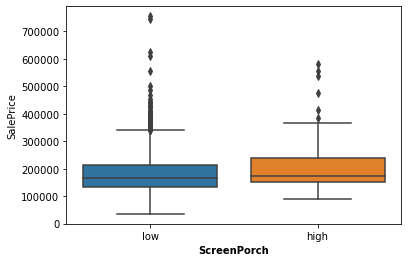

In [224]:
# Box plot of ScreenPorch and SalePrice
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for ScreenPorch = 0
box_plot_data = np.where((housepricedata['ScreenPorch'] == 0),'low',box_plot_data)

# Assigning calue as 'high' to box_plot_data for ScreenPorch > 0
box_plot_data = np.where((housepricedata['ScreenPorch'] > 0),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = housepricedata.SalePrice, data = housepricedata, order=["low","high"])
plt.xlabel('ScreenPorch', fontweight ='bold')
plt.show()

#### The range chosen for 1stAnd2ndFloorSF is
1) low - upto 1144 <br />
2) Medium - from 1144 upto 1479 <br />
3) Medium-High - from 1479 upto 1786 <br />
4) High - above 1786 <br />

### Based on the above box plot of all Input variables for SalePrice, following is the analysis:

<br /> MSSubClass - there is not high amount of distinguishable pattern seen in the sale price
<br /> MSZoning - distinguishable pattern is seen in the sale price
<br /> LotFrontage - distinguishable pattern is seen in the sale price
<br /> LotArea - distinguishable pattern is seen in the sale price
<br /> Street - distinguishable pattern is seen in the sale price
<br /> Alley - there is not high amount of distinguishable pattern seen in the sale price
<br /> LotShape - distinguishable pattern is seen in the sale price
<br /> LandContour - there is not high amount of distinguishable pattern seen in the sale price
<br /> Utilities - there is not high amount of distinguishable pattern seen in the sale price
<br /> LotConfig - there is not high amount of distinguishable pattern seen in the sale price
<br /> LandSlope - distinguishable pattern is seen in the sale price
<br /> Neighborhood - distinguishable pattern is seen in the sale price
<br /> Condition1 - there is not high amount of distinguishable pattern seen in the sale price
<br /> Condition2 - there is not high amount of distinguishable pattern seen in the sale price
<br /> BldgType - there is not high amount of distinguishable pattern seen in the sale price
<br /> HouseStyle - there is not high amount of distinguishable pattern seen in the sale price
<br /> OverallQual - distinguishable pattern is seen in the sale price
<br /> OverallCond - there is not high amount of distinguishable pattern seen in the sale price
<br /> RoofStyle - distinguishable pattern is seen in the sale price
<br /> RoofMatl - distinguishable pattern is seen in the sale price
<br /> Exterior1st - there is not high amount of distinguishable pattern seen in the sale price
<br /> Exterior2nd - there is not high amount of distinguishable pattern seen in the sale price
<br /> MasVnrType - distinguishable pattern is seen in the sale price
<br /> MasVnrArea - distinguishable pattern is seen in the sale price
<br /> ExterQual - distinguishable pattern is seen in the sale price
<br /> ExterCond - distinguishable pattern is seen in the sale price
<br /> Foundation - there is not high amount of distinguishable pattern seen in the sale price
<br /> BsmtQual - distinguishable pattern is seen in the sale price
<br /> BsmtCond - distinguishable pattern is seen in the sale price
<br /> BsmtExposure - distinguishable pattern is seen in the sale price
<br /> BsmtFinType1 - distinguishable pattern is seen in the sale price
<br /> BsmtFinSF1 - there is not high amount of distinguishable pattern seen in the sale price
<br /> BsmtFinType2 - there is not high amount of distinguishable pattern seen in the sale price
<br /> BsmtFinSF2 - there is not high amount of distinguishable pattern seen in the sale price
<br /> BsmtUnfSF - there is not high amount of distinguishable pattern seen in the sale price
<br /> TotalBsmtSF - distinguishable pattern is seen in the sale price
<br /> Heating - there is not high amount of distinguishable pattern seen in the sale price
<br /> HeatingQC - distinguishable pattern is seen in the sale price
<br /> CentralAir - distinguishable pattern is seen in the sale price
<br /> Electrical - distinguishable pattern is seen in the sale price
<br /> 1stFlrSF - distinguishable pattern is seen in the sale price
<br /> 2ndFlrSF - there is not high amount of distinguishable pattern seen in the sale price
<br /> LowQualFinSF - there is not high amount of distinguishable pattern seen in the sale price
<br /> GrLivArea - distinguishable pattern is seen in the sale price
<br /> BsmtFullBath - there is not high amount of distinguishable pattern seen in the sale price
<br /> BsmtHalfBath - there is not high amount of distinguishable pattern seen in the sale price
<br /> FullBath - distinguishable pattern is seen in the sale price
<br /> HalfBath - there is not high amount of distinguishable pattern seen in the sale price
<br /> BedroomAbvGr - there is not high amount of distinguishable pattern seen in the sale price
<br /> KitchenAbvGr - distinguishable pattern is seen in the sale price
<br /> KitchenQual - distinguishable pattern is seen in the sale price
<br /> TotRmsAbvGrd - distinguishable pattern is seen in the sale price
<br /> Functional - there is not high amount of distinguishable pattern seen in the sale price
<br /> Fireplaces - distinguishable pattern is seen in the sale price
<br /> FireplaceQu - distinguishable pattern is seen in the sale price
<br /> GarageType - there is not high amount of distinguishable pattern seen in the sale price
<br /> GarageFinish - there is not high amount of distinguishable pattern seen in the sale price
<br /> GarageCars - there is not high amount of distinguishable pattern seen in the sale price
<br /> GarageArea - distinguishable pattern is seen in the sale price
<br /> GarageQual - distinguishable pattern is seen in the sale price
<br /> GarageCond - there is not high amount of distinguishable pattern seen in the sale price
<br /> PavedDrive - there is not high amount of distinguishable pattern seen in the sale price
<br /> WoodDeckSF - distinguishable pattern is seen in the sale price
<br /> OpenPorchSF - distinguishable pattern is seen in the sale price
<br /> EnclosedPorch - there is not high amount of distinguishable pattern seen in the sale price
<br /> 3SsnPorch - there is not high amount of distinguishable pattern seen in the sale price
<br /> ScreenPorch - there is not high amount of distinguishable pattern seen in the sale price
<br /> PoolArea - there is not high amount of distinguishable pattern seen in the sale price
<br /> PoolQC - distinguishable pattern is seen in the sale price
<br /> Fence - there is not high amount of distinguishable pattern seen in the sale price
<br /> MiscFeature - there is not high amount of distinguishable pattern seen in the sale price
<br /> MiscVal - there is not high amount of distinguishable pattern seen in the sale price
<br /> MoSold - there is not high amount of distinguishable pattern seen in the sale price
<br /> SaleType - there is not high amount of distinguishable pattern seen in the sale price
<br /> SaleCondition - there is not high amount of distinguishable pattern seen in the sale price
<br /> TotalYearsBuilt - distinguishable pattern is seen in the sale price
<br /> TotalYearsRemodAdd - distinguishable pattern is seen in the sale price
<br /> TotalYearsGarageBlt - distinguishable pattern is seen in the sale price
<br /> TotalYearsLastSold - there is not high amount of distinguishable pattern seen in the sale price

#### The range chosen for SalePrice is
1) low - upto 60 <br />
2) Medium - from 60 upto 70 <br />
3) Medium-High - from 70 upto 80 <br />
4) High - above 80 <br />

In [225]:
housepricedata.SalePrice.describe()

count      1370.000000
mean     185194.797080
std       78899.705642
min       35311.000000
25%      133925.000000
50%      167000.000000
75%      217875.000000
max      755000.000000
Name: SalePrice, dtype: float64

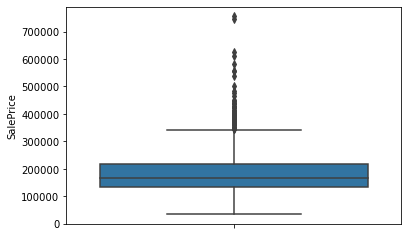

In [226]:
sns.boxplot(y=housepricedata.SalePrice)

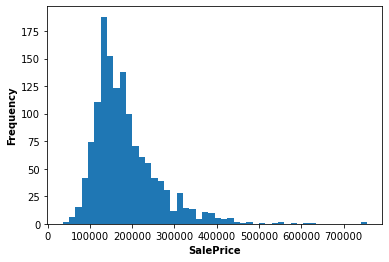

In [227]:
# Histogram of SalePrice
plt.hist(housepricedata.SalePrice,bins='auto')
plt.xlabel('SalePrice', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

As can be seen in histogram the data is skewed to the right. Thus applying the log to the base 10 transform to the data SalePrice

In [228]:
# Applying log to the base 10 transform to the SalePrice
housepricedata.SalePrice = np.log10(housepricedata.SalePrice)

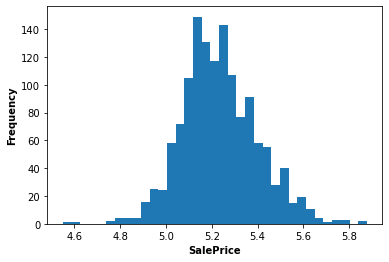

In [229]:
# Histogram of SalePrice after applying log to the base 10 transform
plt.hist(housepricedata.SalePrice,bins='auto')
plt.xlabel('SalePrice', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.show()

After applying log to the base 10 transform, the data looks lot better and much less skewed

#######################################
### Creating dummy variables

#### For following columns
<br />MSSubClass
<br />MSZoning
<br />Street
<br />Alley
<br />LotShape
<br />LandContour
<br />Utilities
<br />LotConfig
<br />LandSlope
<br />Neighborhood
<br />Condition1
<br />Condition2
<br />BldgType
<br />HouseStyle
<br />RoofStyle
<br />RoofMatl
<br />Exterior1st
<br />Exterior2nd
<br />MasVnrType
<br />ExterQual
<br />ExterCond
<br />Foundation
<br />BsmtQual
<br />BsmtCond
<br />BsmtExposure
<br />BsmtFinType1
<br />BsmtFinType2
<br />Heating
<br />HeatingQC
<br />CentralAir
<br />Electrical
<br />KitchenQual
<br />Functional
<br />FireplaceQu
<br />GarageType
<br />GarageFinish
<br />GarageQual
<br />GarageCond
<br />PavedDrive
<br />PoolQC
<br />Fence
<br />MiscFeature
<br />MoSold
<br />SaleType
<br />SaleCondition
#######################################

In [230]:
# List of variables
variable_list = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition']

In [231]:
# Creating dummy variables
variable_list_dummy_variables = pd.get_dummies(housepricedata[variable_list])

In [232]:
# Displaying dummy variables
variable_list_dummy_variables.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [233]:
# Getting and printing the names of all the columns
total_columns = variable_list_dummy_variables.columns.tolist()
print(total_columns)

['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_NA', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighbo

#### For each column based on the number of values the dummy varibles are created. It is required to remove 1 dummy variable.

<br />MSSubClass - 15 dummy variables are created and need to remove 1 dummy variable. Thus MSSubClass_180 is removed.
<br />MSZoning - 5 dummy variables are created and need to remove 1 dummy variable. Thus MSZoning_RM is removed.
<br />Street - 2 dummy variables are created and need to remove 1 dummy variable. Thus Street_Pave is removed.
<br />Alley - 3 dummy variables are created and need to remove 1 dummy variable. Thus Alley_NA is removed.
<br />LotShape - 4 dummy variables are created and need to remove 1 dummy variable. Thus LotShape_Reg is removed.
<br />LandContour - 4 dummy variables are created and need to remove 1 dummy variable. Thus LandContour_Lvl is removed.
<br />Utilities - 2 dummy variables are created and need to remove 1 dummy variable. Thus NoSeWa is removed.
<br />LotConfig - 5 dummy variables are created and need to remove 1 dummy variable. Thus LotConfig_Inside is removed.
<br />LandSlope - 3 dummy variables are created and need to remove 1 dummy variable. Thus LandSlope_Sev is removed.
<br />Neighborhood - 25 dummy variables are created and need to remove 1 dummy variable. Thus Neighborhood_Veenker is removed.
<br />Condition1 - 9 dummy variables are created and need to remove 1 dummy variable. Thus Condition1_RRNn is removed.
<br />Condition2 - 6 dummy variables are created and need to remove 1 dummy variable. Thus Condition2_RRNn is removed.
<br />BldgType - 5 dummy variables are created and need to remove 1 dummy variable. Thus BldgType_TwnhsI is removed.
<br />HouseStyle - 8 dummy variables are created and need to remove 1 dummy variable. Thus HouseStyle_SLvl is removed.
<br />RoofStyle - 5 dummy variables are created and need to remove 1 dummy variable. Thus RoofStyle_Mansard is removed.
<br />RoofMatl - 7 dummy variables are created and need to remove 1 dummy variable. Thus RoofMatl_WdShngl is removed.
<br />Exterior1st - 14 dummy variables are created and need to remove 1 dummy variable. Thus Exterior1st_WdShing is removed.
<br />Exterior2nd - 16 dummy variables are created and need to remove 1 dummy variable. Thus Exterior2nd_Stucco is removed.
<br />MasVnrType - 4 dummy variables are created and need to remove 1 dummy variable. Thus MasVnrType_None is removed.
<br />ExterQual - 4 dummy variables are created and need to remove 1 dummy variable. Thus ExterQual_Fa is removed.
<br />ExterCond - 4 dummy variables are created and need to remove 1 dummy variable. Thus ExterCond_TA is removed.
<br />Foundation - 6 dummy variables are created and need to remove 1 dummy variable. Thus Foundation_CBlock is removed.
<br />BsmtQual - 5 dummy variables are created and need to remove 1 dummy variable. Thus BsmtQual_NA is removed.
<br />BsmtCond - 5 dummy variables are created and need to remove 1 dummy variable. Thus BsmtCond_NA is removed.
<br />BsmtExposure - 5 dummy variables are created and need to remove 1 dummy variable. Thus BsmtExposure_No is removed.
<br />BsmtFinType1 - 7 dummy variables are created and need to remove 1 dummy variable. Thus BsmtFinType1_Unf is removed.
<br />BsmtFinType2 - 7 dummy variables are created and need to remove 1 dummy variable. Thus BsmtFinType2_NA is removed.
<br />Heating - 5 dummy variables are created and need to remove 1 dummy variable. Thus Heating_OthW is removed.
<br />HeatingQC - 5 dummy variables are created and need to remove 1 dummy variable. Thus HeatingQC_TA is removed.
<br />CentralAir - 2 dummy variables are created and need to remove 1 dummy variable. Thus CentralAir_N is removed.
<br />Electrical - 5 dummy variables are created and need to remove 1 dummy variable. Thus Electrical_Mix is removed.
<br />KitchenQual - 4 dummy variables are created and need to remove 1 dummy variable. Thus KitchenQual_TA is removed.
<br />Functional - 6 dummy variables are created and need to remove 1 dummy variable. Thus Functional_Typ is removed.
<br />FireplaceQu - 6 dummy variables are created and need to remove 1 dummy variable. Thus FireplaceQu_TA is removed.
<br />GarageType - 6 dummy variables are created and need to remove 1 dummy variable. Thus GarageType_Detchd is removed.
<br />GarageFinish - 3 dummy variables are created and need to remove 1 dummy variable. Thus GarageFinish_Unf is removed.
<br />GarageQual - 5 dummy variables are created and need to remove 1 dummy variable. Thus GarageQual_TA is removed.
<br />GarageCond - 5 dummy variables are created and need to remove 1 dummy variable. Thus GarageCond_Po is removed.
<br />PavedDrive - 3 dummy variables are created and need to remove 1 dummy variable. Thus PavedDrive_N is removed.
<br />PoolQC - 4 dummy variables are created and need to remove 1 dummy variable. Thus PoolQC_Fa is removed.
<br />Fence - 5 dummy variables are created and need to remove 1 dummy variable. Thus Fence_MnPrv is removed.
<br />MiscFeature - 4 dummy variables are created and need to remove 1 dummy variable. Thus MiscFeature_NA is removed.
<br />MoSold - 12 dummy variables are created and need to remove 1 dummy variable. Thus MoSold_12 is removed.
<br />SaleType - 9 dummy variables are created and need to remove 1 dummy variable. Thus SaleType_ConLw is removed.
<br />SaleCondition - 6 dummy variables are created and need to remove 1 dummy variable. Thus SaleCondition_Partial is removed.

In [234]:
# Dropping the following columns
variable_list_dummy_variables = variable_list_dummy_variables.drop(['MSSubClass_180','MSZoning_RM','Street_Pave','Alley_NA','LotShape_Reg','LandContour_Lvl','Utilities_NoSeWa','LotConfig_Inside','LandSlope_Sev','Neighborhood_Veenker','Condition1_RRNn','Condition2_RRNn','BldgType_TwnhsI','HouseStyle_SLvl','RoofStyle_Mansard','RoofMatl_WdShngl','Exterior1st_WdShing','Exterior2nd_Stucco','MasVnrType_None','ExterQual_Fa','ExterCond_TA','Foundation_CBlock','BsmtQual_NA','BsmtCond_NA','BsmtExposure_No','BsmtFinType1_Unf','BsmtFinType2_NA','Heating_OthW','HeatingQC_TA','CentralAir_N','Electrical_Mix','KitchenQual_TA','Functional_Typ','FireplaceQu_TA','GarageType_Detchd','GarageFinish_Unf','GarageQual_TA','GarageCond_Po','PavedDrive_N','PoolQC_Fa','Fence_MnPrv','MiscFeature_NA','MoSold_12','SaleType_ConLw','SaleCondition_Partial'],axis=1)

In [235]:
# Displaying the remaining columns and top 5 rows for dummy variables
variable_list_dummy_variables.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [236]:
# Getting and printing the names of all remaining the columns
total_columns = variable_list_dummy_variables.columns.tolist()
print(total_columns)

['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Grvl', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Gtl', 'LandSlope_Mod', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_Names', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTo

In [237]:
# Adding the dummy variables to original dataframe
housepricedata_new = pd.concat([housepricedata,variable_list_dummy_variables],axis=1)

#### As dummy variables for the following columns are added to the dataframe, it is required to drop the following columns:
<br />MSSubClass
<br />MSZoning
<br />Street
<br />Alley
<br />LotShape
<br />LandContour
<br />Utilities
<br />LotConfig
<br />LandSlope
<br />Neighborhood
<br />Condition1
<br />Condition2
<br />BldgType
<br />HouseStyle
<br />RoofStyle
<br />RoofMatl
<br />Exterior1st
<br />Exterior2nd
<br />MasVnrType
<br />ExterQual
<br />ExterCond
<br />Foundation
<br />BsmtQual
<br />BsmtCond
<br />BsmtExposure
<br />BsmtFinType1
<br />BsmtFinType2
<br />Heating
<br />HeatingQC
<br />CentralAir
<br />Electrical
<br />KitchenQual
<br />Functional
<br />FireplaceQu
<br />GarageType
<br />GarageFinish
<br />GarageQual
<br />GarageCond
<br />PavedDrive
<br />PoolQC
<br />Fence
<br />MiscFeature
<br />MoSold
<br />SaleType
<br />SaleCondition

In [238]:
# Dropping the total of 10 columns shown above
housepricedata_new = housepricedata_new.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition'],axis=1)

In [239]:
# Getting and printing the names of all the columns
total_columns = housepricedata_new.columns.tolist()
print(total_columns)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalYearsBuilt', 'TotalYearsRemodAdd', 'TotalYearsGarageBlt', 'TotalYearsLastSold', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Grvl', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'LotConfig

In [240]:
housepricedata_new.shape

(1370, 277)

####################################################################
### Splitting the data into training set and testing set
####################################################################

In [241]:
# Dividing the data set into training set and testing set. 
np.random.seed(0)
train_housepricedata, test_housepricedata = train_test_split(housepricedata_new, train_size = 0.75, test_size = 0.25, random_state = 100)

In [242]:
print("After data cleaning is completed there are {} rows and {} columns for training data set. ".format((train_housepricedata.shape)[0],(train_housepricedata.shape)[1]))

After data cleaning is completed there are 1027 rows and 277 columns for training data set. 


In [243]:
print("After data cleaning is completed there are {} rows and {} columns for testing data set. ".format((test_housepricedata.shape)[0],(test_housepricedata.shape)[1]))

After data cleaning is completed there are 343 rows and 277 columns for testing data set. 


In [244]:
# Displaying top five rows of data of training data set
train_housepricedata.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
330,69,10624,5,4,84,40,264,1424,1728,1728,...,0,0,0,0,1,0,0,0,0,1
835,60,9600,4,7,0,442,0,625,1067,1067,...,0,0,0,0,1,0,0,0,0,1
789,69,12205,6,8,157,568,0,264,832,976,...,0,0,0,0,1,0,0,0,0,1
978,68,9450,4,5,0,552,0,342,894,894,...,0,0,0,0,1,1,0,0,0,0
25,110,14230,8,5,640,0,0,1566,1566,1600,...,0,0,0,0,1,0,0,0,0,1


#########################################################
### Rescaling the features
#########################################################

In [245]:
# Min-max scaling
scaler = MinMaxScaler()

In [246]:
# Apply scaler() to the following columns
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','TotalYearsBuilt','TotalYearsRemodAdd','TotalYearsGarageBlt','TotalYearsLastSold']

In [247]:
# Apply fit_transform to Training data
train_housepricedata[num_vars] = scaler.fit_transform(train_housepricedata[num_vars])

In [248]:
# Apply transform to Test data
test_housepricedata[num_vars] = scaler.transform(test_housepricedata[num_vars])

In [249]:
# Displaying the Train Data
train_housepricedata.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.0,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,0.170669,0.045175,0.454862,0.515649,0.066555,0.080614,0.035383,0.245289,0.176782,0.167102,...,0.004869,0.002921,0.084713,0.0,0.867575,0.064265,0.000974,0.006816,0.012658,0.829601
std,0.077909,0.053546,0.190279,0.157077,0.112064,0.082797,0.117557,0.192168,0.073321,0.092951,...,0.069639,0.053995,0.278589,0.0,0.339117,0.245344,0.031204,0.082317,0.111849,0.376166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.030106,0.285714,0.428571,0.000000,0.000000,0.000000,0.096104,0.133552,0.099311,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.164384,0.038795,0.428571,0.428571,0.000000,0.070517,0.000000,0.200342,0.165303,0.146591,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.202055,0.049288,0.571429,0.571429,0.105625,0.127481,0.000000,0.347817,0.218985,0.223212,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


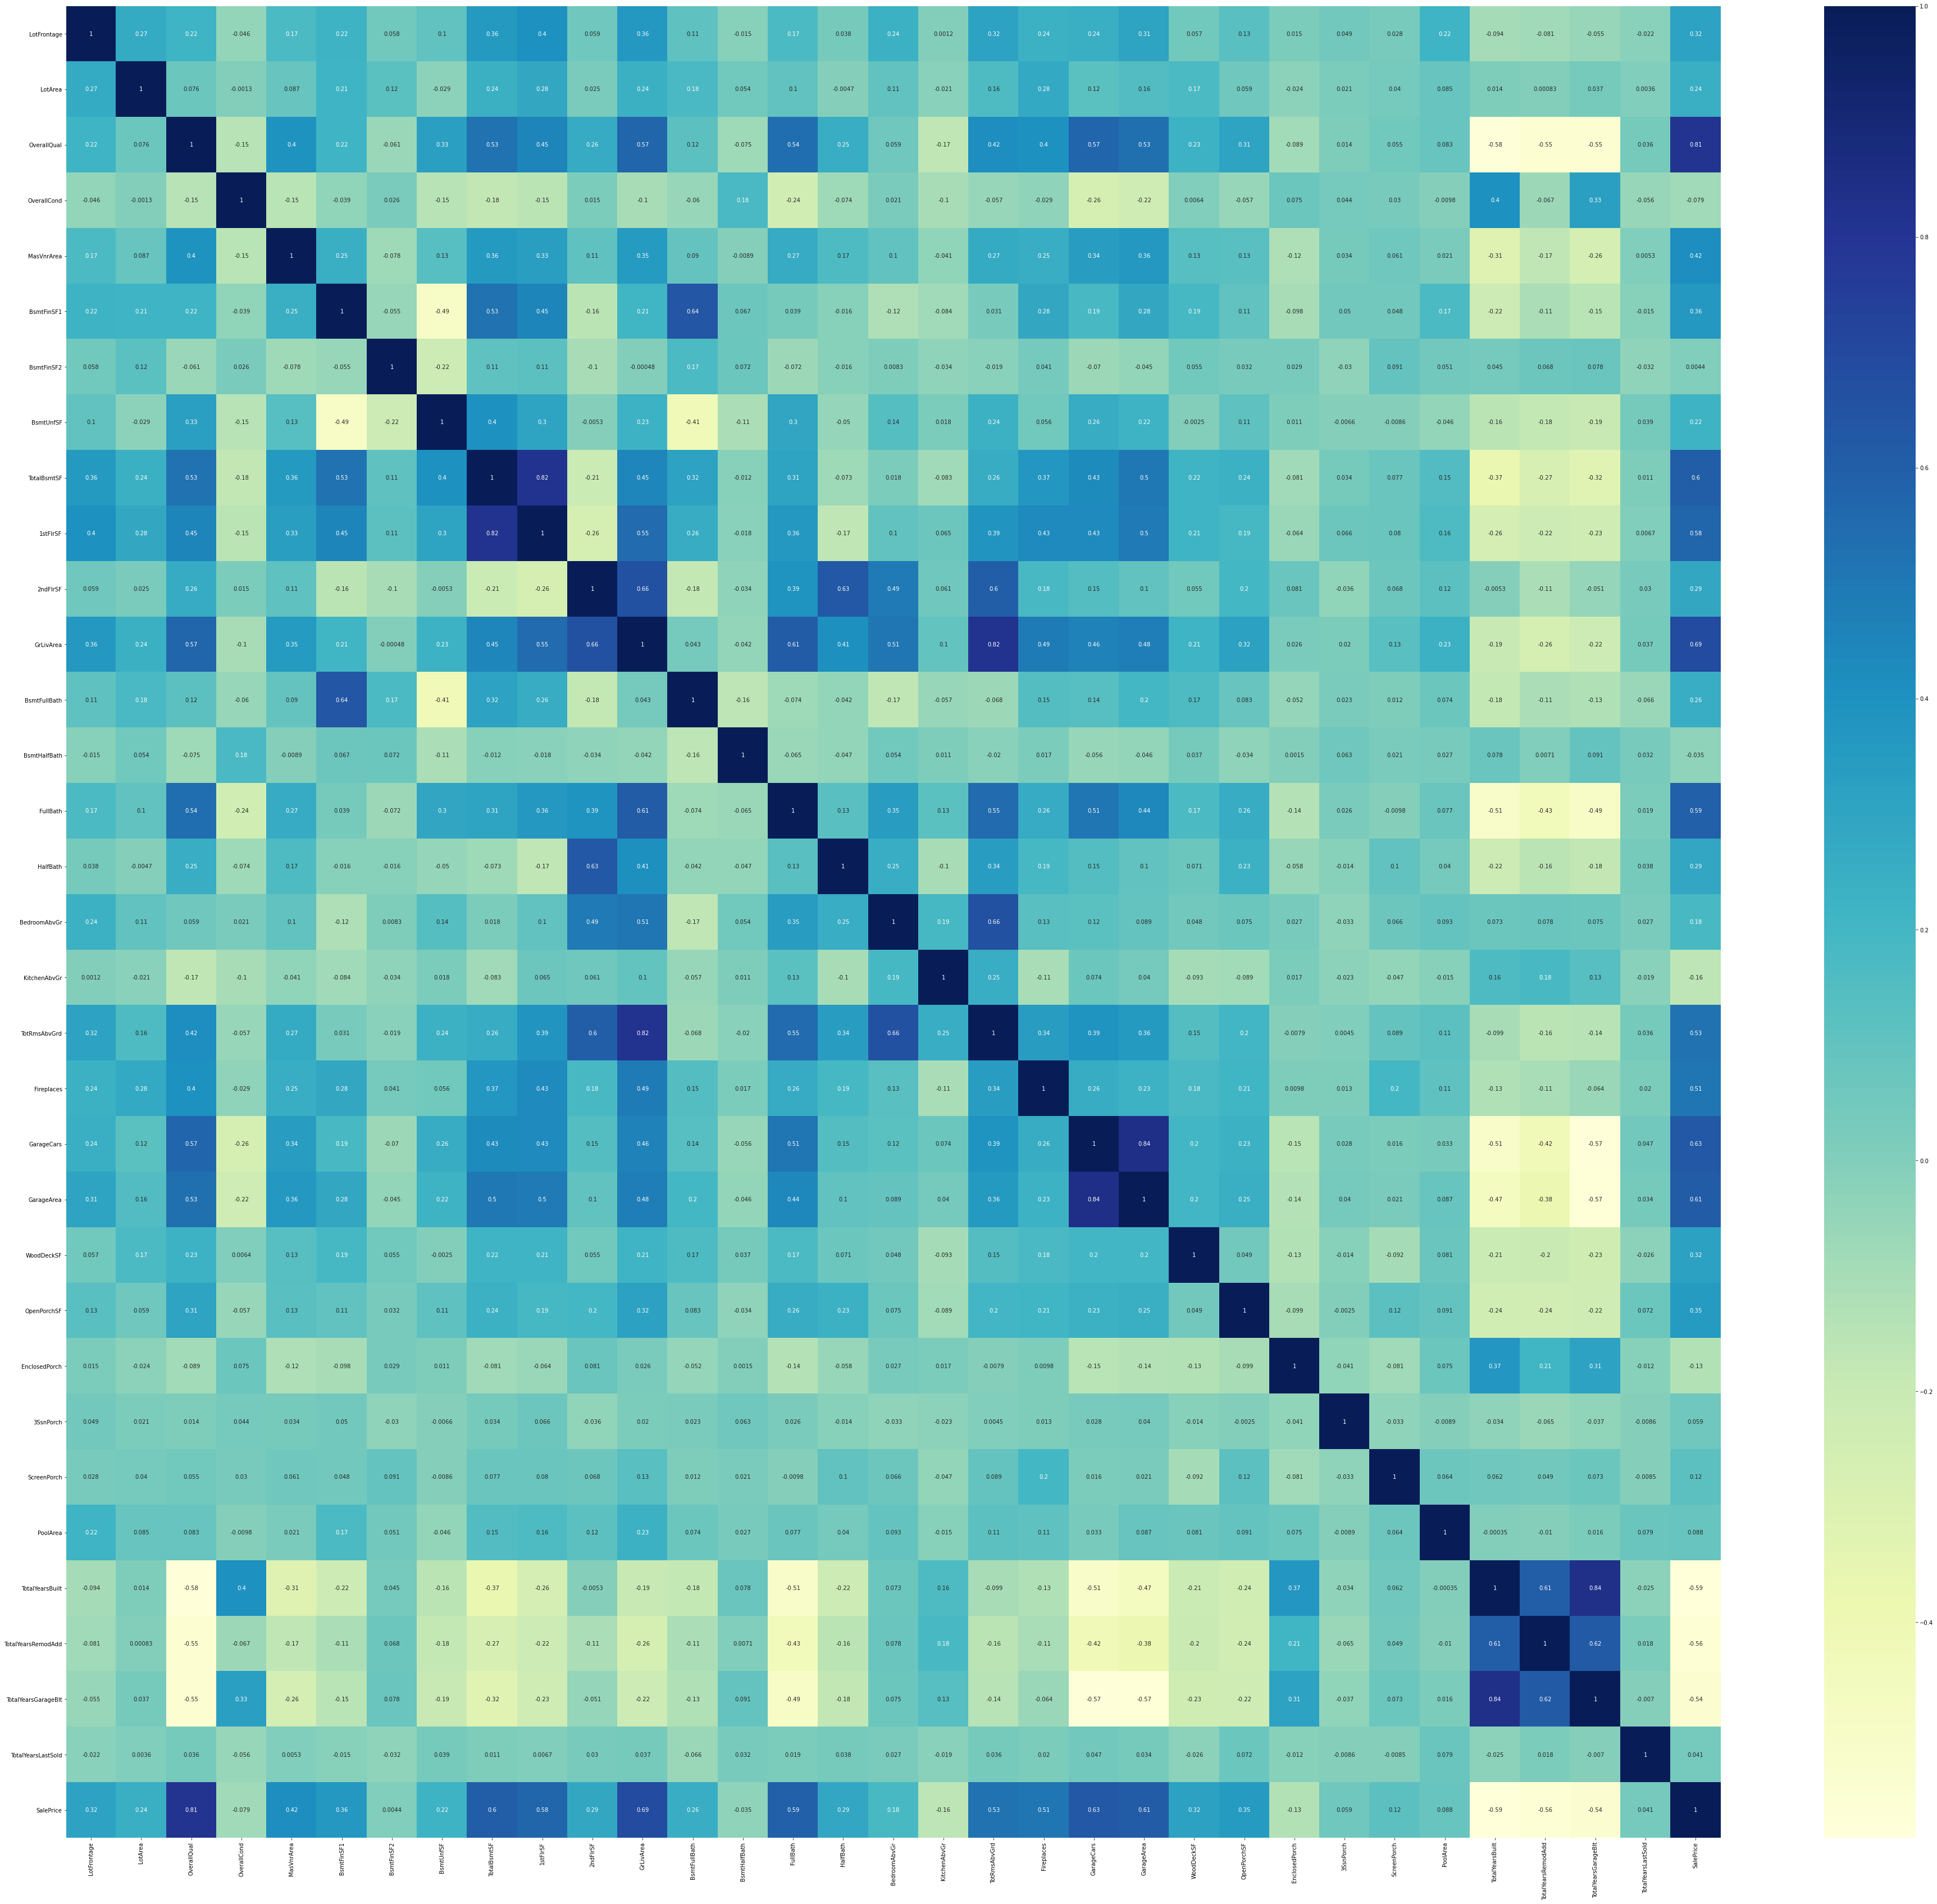

In [250]:
# Correlation Matrix for numerical or continuous variables
num_vars_correlation = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','TotalYearsBuilt','TotalYearsRemodAdd','TotalYearsGarageBlt','TotalYearsLastSold','SalePrice']
numerical_continuous_variables = train_housepricedata[num_vars_correlation]
plt.figure(figsize = (66, 60))
sns.heatmap(numerical_continuous_variables.corr(), annot = True, cmap="YlGnBu")
plt.show()#

In [251]:
# Correlation coefficients for numerical or continuous variables

corr = numerical_continuous_variables.corr().unstack().sort_values(ascending=False)
pd.set_option('display.max_rows', len(corr))
print(corr)
pd.reset_option('display.max_rows')

SalePrice            SalePrice              1.000000
HalfBath             HalfBath               1.000000
TotalYearsRemodAdd   TotalYearsRemodAdd     1.000000
TotalYearsBuilt      TotalYearsBuilt        1.000000
PoolArea             PoolArea               1.000000
ScreenPorch          ScreenPorch            1.000000
3SsnPorch            3SsnPorch              1.000000
EnclosedPorch        EnclosedPorch          1.000000
OpenPorchSF          OpenPorchSF            1.000000
WoodDeckSF           WoodDeckSF             1.000000
GarageArea           GarageArea             1.000000
GarageCars           GarageCars             1.000000
Fireplaces           Fireplaces             1.000000
TotRmsAbvGrd         TotRmsAbvGrd           1.000000
KitchenAbvGr         KitchenAbvGr           1.000000
FullBath             FullBath               1.000000
TotalYearsLastSold   TotalYearsLastSold     1.000000
BsmtHalfBath         BsmtHalfBath           1.000000
BsmtFullBath         BsmtFullBath           1.

#### As seen above there is high correlation (greater than 0.8 and less than -0.8) between the following input variables:

<br /> GarageArea and GarageCars (0.840602)
<br /> TotalYearsGarageBlt and TotalYearsBuilt (0.836462)
<br /> GrLivArea and TotRmsAbvGrd (0.819343)
<br /> TotalBsmtSF and 1stFlrSF (0.815120)
<br /> OverallQual and SalePrice (0.809329)


In [252]:
# Shape of the train data
train_housepricedata.shape

(1027, 277)

In [253]:
# Shape of the test data
test_housepricedata.shape

(343, 277)

####################################################################
### Dividing into X and Y sets for training set and test set
####################################################################

In [254]:
# Training data output variable
train_housepricedata_output_variable =  train_housepricedata['SalePrice']

In [255]:
# Dropping the price column
train_housepricedata_input_variables = train_housepricedata.drop('SalePrice',axis=1)

In [256]:
# Test data output variable
test_housepricedata_output_variable =  test_housepricedata['SalePrice']

In [257]:
# Dropping the price column
test_housepricedata_input_variables = test_housepricedata.drop('SalePrice',axis=1)

In [258]:
# Getting and printing the names of all the columns
total_columns = train_housepricedata_input_variables.columns.tolist()
print(total_columns)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalYearsBuilt', 'TotalYearsRemodAdd', 'TotalYearsGarageBlt', 'TotalYearsLastSold', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Grvl', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'LotConfig_Corner', 'Lo

In [259]:
# Shape of train data input variable
train_housepricedata_input_variables.shape

(1027, 276)

In [260]:
# Shape of test data input variable
test_housepricedata_input_variables.shape

(343, 276)

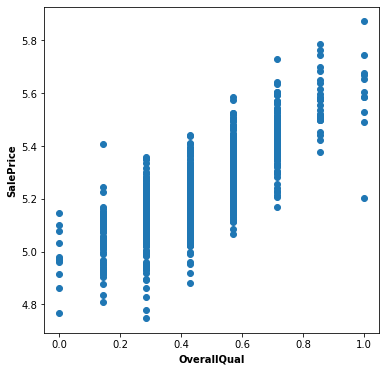

In [261]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.OverallQual, train_housepricedata_output_variable)
plt.xlabel('OverallQual', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [262]:
# Correlation between price and OverallQual
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.OverallQual)
print(round(correlation,4))

0.8093


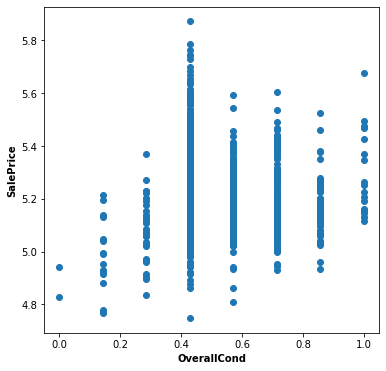

In [263]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.OverallCond, train_housepricedata_output_variable)
plt.xlabel('OverallCond', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [264]:
# Correlation between price and OverallCond
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.OverallCond)
print(round(correlation,4))

-0.079


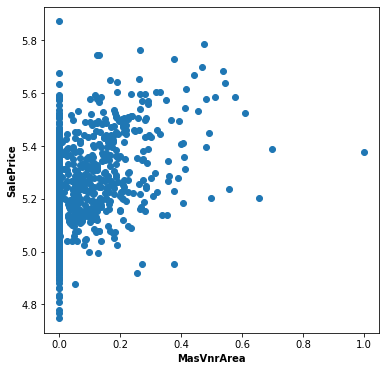

In [265]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.MasVnrArea, train_housepricedata_output_variable)
plt.xlabel('MasVnrArea', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [266]:
# Correlation between price and MasVnrArea
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.MasVnrArea)
print(round(correlation,4))

0.4165


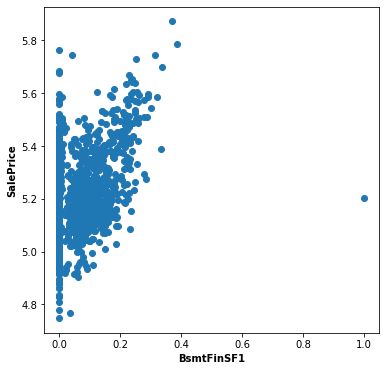

In [267]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BsmtFinSF1, train_housepricedata_output_variable)
plt.xlabel('BsmtFinSF1', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [268]:
# Correlation between price and BsmtFinSF1
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BsmtFinSF1)
print(round(correlation,4))

0.3642


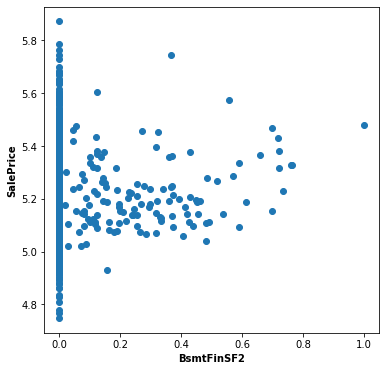

In [269]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BsmtFinSF2, train_housepricedata_output_variable)
plt.xlabel('BsmtFinSF2', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [270]:
# Correlation between price and BsmtFinSF2
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BsmtFinSF2)
print(round(correlation,4))

0.0044


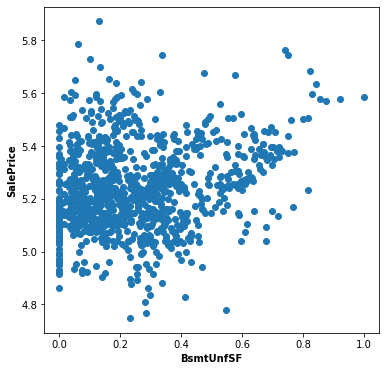

In [271]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BsmtUnfSF, train_housepricedata_output_variable)
plt.xlabel('BsmtUnfSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [272]:
# Correlation between price and BsmtUnfSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BsmtUnfSF)
print(round(correlation,4))

0.2227


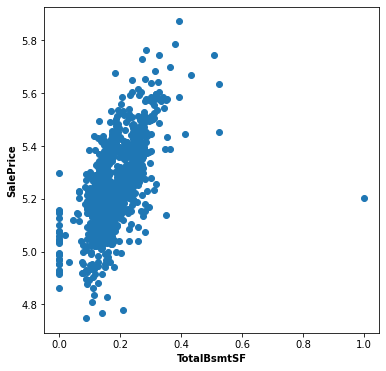

In [273]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotalBsmtSF, train_housepricedata_output_variable)
plt.xlabel('TotalBsmtSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [274]:
# Correlation between price and TotalBsmtSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotalBsmtSF)
print(round(correlation,4))

0.6047


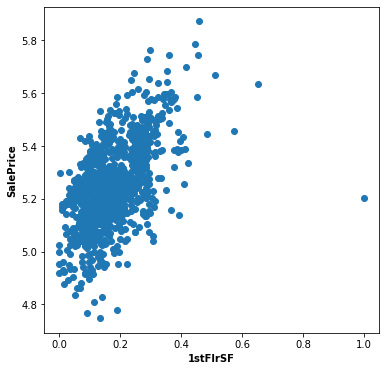

In [275]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables['1stFlrSF'], train_housepricedata_output_variable)
plt.xlabel('1stFlrSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [276]:
# Correlation between price and 1stFlrSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables['1stFlrSF'])
print(round(correlation,4))

0.577


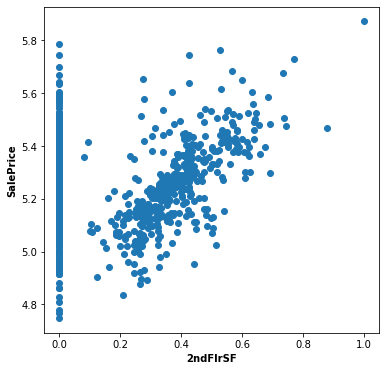

In [277]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables['2ndFlrSF'], train_housepricedata_output_variable)
plt.xlabel('2ndFlrSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [278]:
# Correlation between price and 2ndFlrSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables['2ndFlrSF'])
print(round(correlation,4))

0.2856


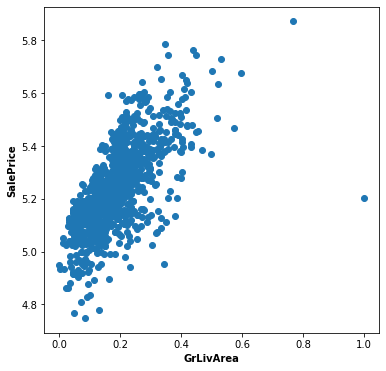

In [279]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.GrLivArea, train_housepricedata_output_variable)
plt.xlabel('GrLivArea', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [280]:
# Correlation between price and GrLivArea
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.GrLivArea)
print(round(correlation,4))

0.6911


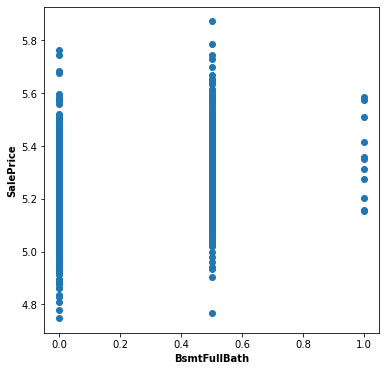

In [281]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BsmtFullBath, train_housepricedata_output_variable)
plt.xlabel('BsmtFullBath', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [282]:
# Correlation between price and BsmtFullBath
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BsmtFullBath)
print(round(correlation,4))

0.2559


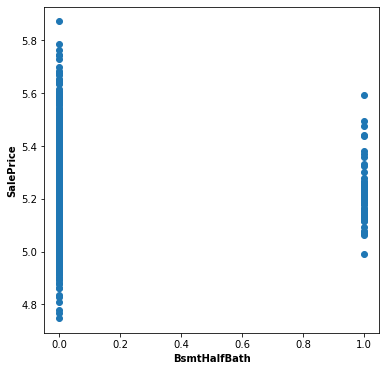

In [283]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BsmtHalfBath, train_housepricedata_output_variable)
plt.xlabel('BsmtHalfBath', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [284]:
# Correlation between price and BsmtHalfBath
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BsmtHalfBath)
print(round(correlation,4))

-0.0346


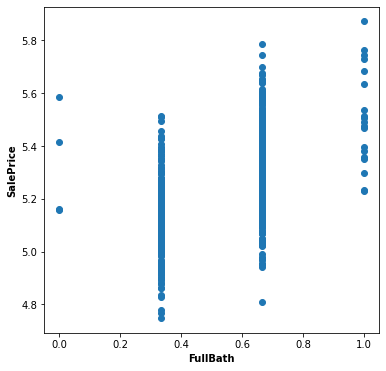

In [285]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.FullBath, train_housepricedata_output_variable)
plt.xlabel('FullBath', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [286]:
# Correlation between price and FullBath
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.FullBath)
print(round(correlation,4))

0.5937


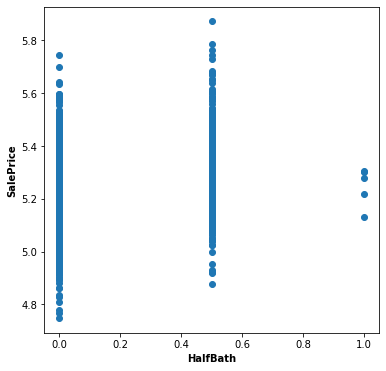

In [287]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.HalfBath, train_housepricedata_output_variable)
plt.xlabel('HalfBath', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [288]:
# Correlation between price and HalfBath
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.HalfBath)
print(round(correlation,4))

0.2887


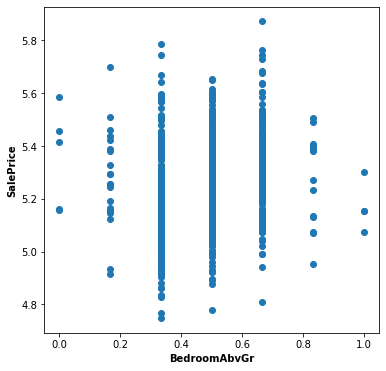

In [289]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.BedroomAbvGr, train_housepricedata_output_variable)
plt.xlabel('BedroomAbvGr', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [290]:
# Correlation between price and BedroomAbvGr
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.BedroomAbvGr)
print(round(correlation,4))

0.1848


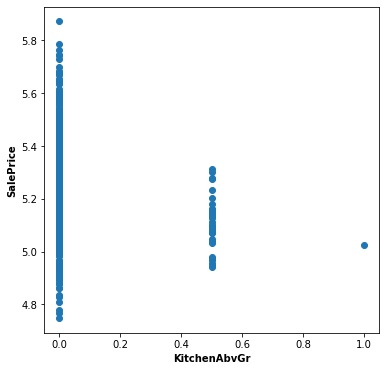

In [291]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.KitchenAbvGr, train_housepricedata_output_variable)
plt.xlabel('KitchenAbvGr', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [292]:
# Correlation between price and KitchenAbvGr
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.KitchenAbvGr)
print(round(correlation,4))

-0.1602


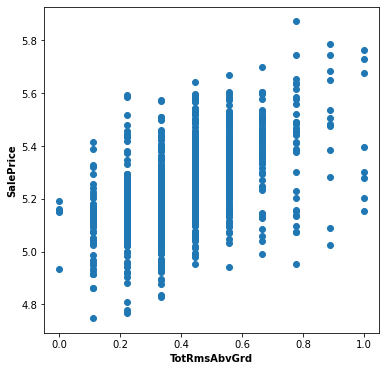

In [293]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotRmsAbvGrd, train_housepricedata_output_variable)
plt.xlabel('TotRmsAbvGrd', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [294]:
# Correlation between price and TotRmsAbvGrd
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotRmsAbvGrd)
print(round(correlation,4))

0.5277


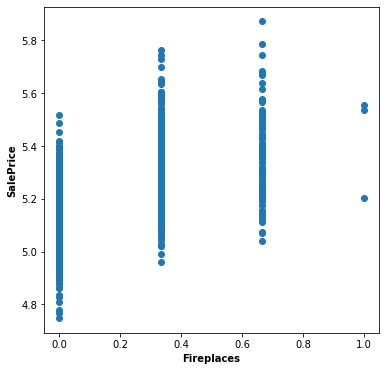

In [295]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.Fireplaces, train_housepricedata_output_variable)
plt.xlabel('Fireplaces', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [296]:
# Correlation between price and Fireplaces
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.Fireplaces)
print(round(correlation,4))

0.5086


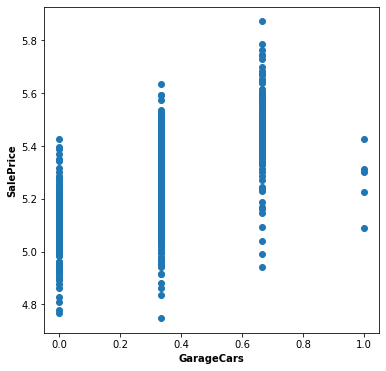

In [297]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.GarageCars, train_housepricedata_output_variable)
plt.xlabel('GarageCars', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [298]:
# Correlation between price and GarageCars
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.GarageCars)
print(round(correlation,4))

0.634


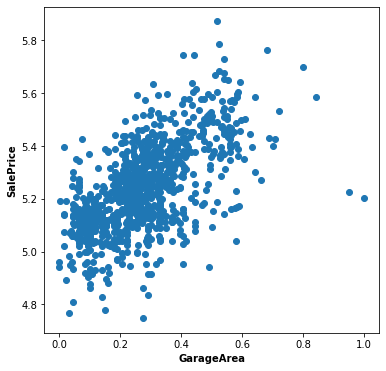

In [299]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.GarageArea, train_housepricedata_output_variable)
plt.xlabel('GarageArea', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [300]:
# Correlation between price and GarageArea
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.GarageArea)
print(round(correlation,4))

0.6124


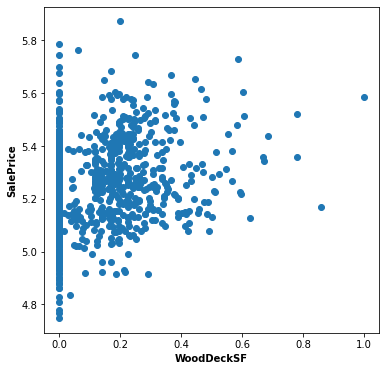

In [301]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.WoodDeckSF, train_housepricedata_output_variable)
plt.xlabel('WoodDeckSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [302]:
# Correlation between price and WoodDeckSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.WoodDeckSF)
print(round(correlation,4))

0.3215


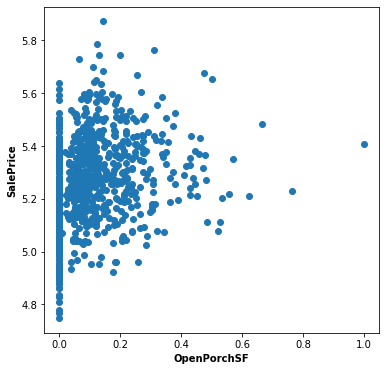

In [303]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.OpenPorchSF, train_housepricedata_output_variable)
plt.xlabel('OpenPorchSF', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [304]:
# Correlation between price and OpenPorchSF
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.OpenPorchSF)
print(round(correlation,4))

0.3545


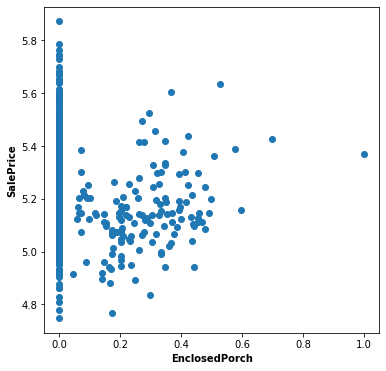

In [305]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.EnclosedPorch, train_housepricedata_output_variable)
plt.xlabel('EnclosedPorch', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [306]:
# Correlation between price and EnclosedPorch
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.EnclosedPorch)
print(round(correlation,4))

-0.1333


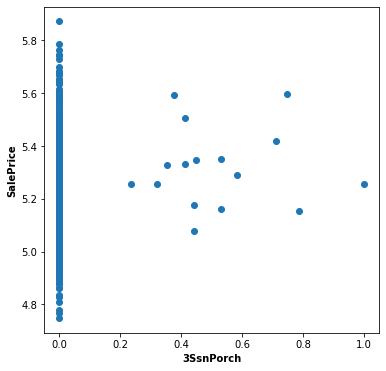

In [307]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables['3SsnPorch'], train_housepricedata_output_variable)
plt.xlabel('3SsnPorch', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [308]:
# Correlation between price and 3SsnPorch
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables['3SsnPorch'])
print(round(correlation,4))

0.0594


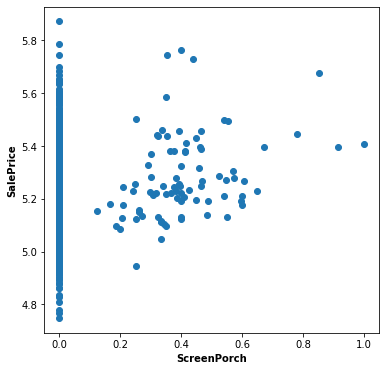

In [309]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.ScreenPorch, train_housepricedata_output_variable)
plt.xlabel('ScreenPorch', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [310]:
# Correlation between price and ScreenPorch
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.ScreenPorch)
print(round(correlation,4))

0.1176


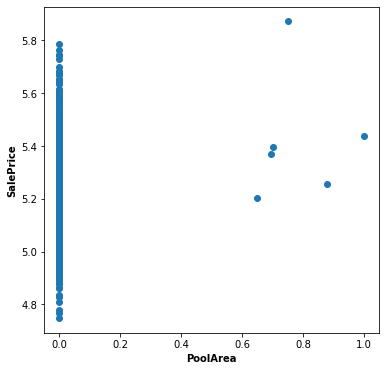

In [311]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.PoolArea, train_housepricedata_output_variable)
plt.xlabel('PoolArea', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [312]:
# Correlation between price and PoolArea
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.PoolArea)
print(round(correlation,4))

0.0883


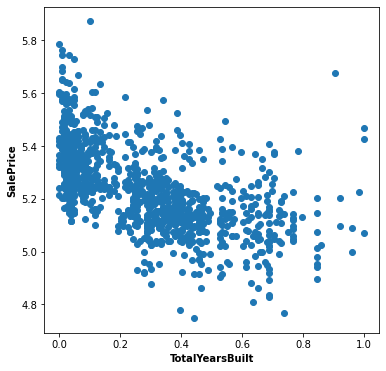

In [313]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotalYearsBuilt, train_housepricedata_output_variable)
plt.xlabel('TotalYearsBuilt', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [314]:
# Correlation between price and TotalYearsBuilt
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotalYearsBuilt)
print(round(correlation,4))

-0.5868


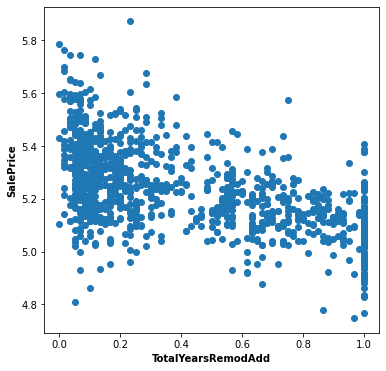

In [315]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotalYearsRemodAdd, train_housepricedata_output_variable)
plt.xlabel('TotalYearsRemodAdd', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [316]:
# Correlation between price and TotalYearsRemodAdd
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotalYearsRemodAdd)
print(round(correlation,4))

-0.5589


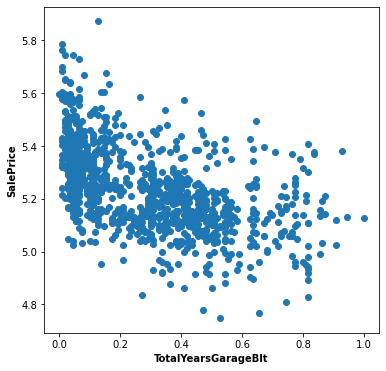

In [317]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotalYearsGarageBlt, train_housepricedata_output_variable)
plt.xlabel('TotalYearsGarageBlt', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [318]:
# Correlation between price and TotalYearsGarageBlt
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotalYearsGarageBlt)
print(round(correlation,4))

-0.5425


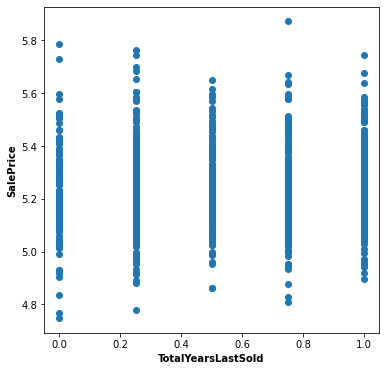

In [319]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.TotalYearsLastSold, train_housepricedata_output_variable)
plt.xlabel('TotalYearsLastSold', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [320]:
# Correlation between price and TotalYearsLastSold
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.TotalYearsLastSold)
print(round(correlation,4))

0.0412


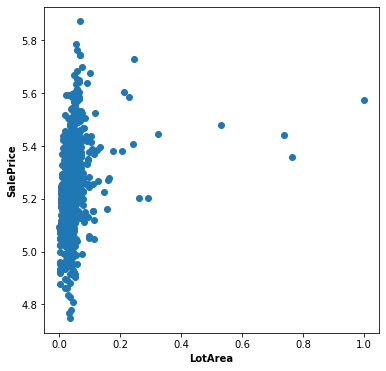

In [321]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.LotArea, train_housepricedata_output_variable)
plt.xlabel('LotArea', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [322]:
# Correlation between price and LotArea
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.LotArea)
print(round(correlation,4))

0.2447


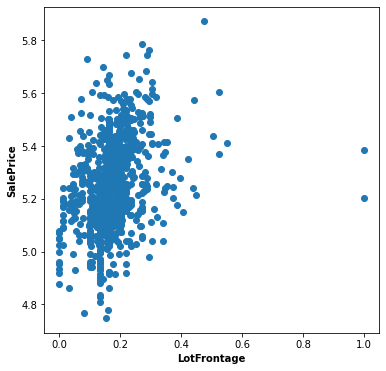

In [323]:
# Scatter Plot
plt.figure(figsize=[6,6])
plt.scatter(train_housepricedata_input_variables.LotFrontage, train_housepricedata_output_variable)
plt.xlabel('LotFrontage', fontweight ='bold') 
plt.ylabel('SalePrice', fontweight ='bold')
plt.show()

In [324]:
# Correlation between price and LotFrontage
correlation = train_housepricedata_output_variable.corr(train_housepricedata_input_variables.LotFrontage)
print(round(correlation,4))

0.3172


#### As seen in the above scatter plots:

<br /> The following variables has less than 0.5 and greater than -0.5 correlation with SalePrice
<br />The following variables has correlation greater than 0.5 or less than -0.5 with SalePrice
<br />TotalYearsLastSold, 
PoolArea, 
ScreenPorch, 
3SsnPorch, 
EnclosedPorch, 
OpenPorchSF, 
WoodDeckSF, 
KitchenAbvGr, 
BedroomAbvGr, 
HalfBath, 
BsmtHalfBath, 
BsmtFullBath, 
2ndFlrSF, 
BsmtUnfSF, 
BsmtFinSF2, 
BsmtFinSF1, 
MasVnrArea, 
OverallCond, 
LotArea, 
LotFrontage
<br />
<br />The following variables has correlation greater than 0.5 or less than -0.5 with SalePrice
<br />TotalYearsGarageBlt, 
TotalYearsRemodAdd, 
TotalYearsBuilt, 
GarageArea, 
GarageCars, 
Fireplaces, 
TotRmsAbvGrd, 
FullBath, 
GrLivArea, 
1stFlrSF, 
TotalBsmtSF, 
OverallQual 

#################################################################
#### Model Building
#################################################################

#################################################################################################
#### RFE (Recursive Feature Elimination)
<br />RFE is used to bring the input variables from 276 to 30.
<br />Then Ridge and Lasso regression will be done, to further bring down the variables to 15
#################################################################################################

In [325]:
# Running RFE
lm = LinearRegression()
lm.fit(train_housepricedata_input_variables, train_housepricedata_output_variable)

# Running RFE to get 30 variables
rfe = RFE(lm, 30)
rfe = rfe.fit(train_housepricedata_input_variables, train_housepricedata_output_variable)

In [326]:
list(zip(train_housepricedata_input_variables.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 33),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 183),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', False, 17),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 37),
 ('2ndFlrSF', False, 32),
 ('LowQualFinSF', False, 240),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 82),
 ('BsmtHalfBath', False, 184),
 ('FullBath', False, 81),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 176),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 193),
 ('Fireplaces', False, 186),
 ('GarageCars', False, 59),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 50),
 ('OpenPorchSF', False, 42),
 ('EnclosedPorch', False, 64),
 ('3SsnPorch', False, 62),
 ('ScreenPorch', False, 36),
 ('PoolArea', True, 1),
 ('MiscVal', False, 245),
 ('TotalYearsBuilt', True, 1),
 ('TotalYearsRemodAdd', False, 94),
 ('TotalYearsGarageBlt', False, 219),
 ('TotalYearsLastSold', False, 178),
 ('MSSubClass_120', False,

In [327]:
# List of 30 variables obtained from RFE
RFE_variables = ['LotArea','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF','GrLivArea','KitchenAbvGr','GarageArea','PoolArea','TotalYearsBuilt','MSZoning_C','Street_Grvl','LandSlope_Gtl','LandSlope_Mod','Condition2_PosN','Condition2_RRAe','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_Membran','RoofMatl_Metal','Exterior1st_BrkComm','Foundation_Stone','Foundation_Wood','Electrical_FuseP','Functional_Maj2','Functional_Sev','PoolQC_NA','SaleType_New','SaleCondition_AdjLand','SaleCondition_Normal']

In [328]:
# Input variables from RFE for Ridge and Lasso
Regularization_Input_Train_Variables = train_housepricedata_input_variables[RFE_variables]
Regularization_Input_Test_Variables = test_housepricedata_input_variables[RFE_variables]

#################################################################
#### Ridge Regression
#################################################################

In [329]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Regularization_Input_Train_Variables, train_housepricedata_output_variable) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [330]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=40]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014792,0.006396,0.006197,0.001469,0.0001,{'alpha': 0.0001},-0.043095,-0.041251,-0.035107,-0.033736,...,-0.038512,0.003568,1,-0.033485,-0.035537,-0.035366,-0.035423,-0.034727,-0.034908,0.000765
1,0.021987,0.003285,0.005797,0.000747,0.001,{'alpha': 0.001},-0.043094,-0.041323,-0.035102,-0.033738,...,-0.038527,0.003579,2,-0.033486,-0.035545,-0.035374,-0.035431,-0.034732,-0.034914,0.000768
2,0.024586,0.007731,0.005596,0.000489,0.01,{'alpha': 0.01},-0.043181,-0.041721,-0.035055,-0.033756,...,-0.038629,0.003673,3,-0.033555,-0.035629,-0.035449,-0.035499,-0.034788,-0.034984,0.000772
3,0.020400,0.013335,0.007429,0.003533,0.05,{'alpha': 0.05},-0.043506,-0.041998,-0.034899,-0.033807,...,-0.038777,0.003828,4,-0.033749,-0.035786,-0.035826,-0.035818,-0.034990,-0.035234,0.000808
4,0.008057,0.003117,0.004024,0.004218,0.1,{'alpha': 0.1},-0.043664,-0.041925,-0.034797,-0.033853,...,-0.038808,0.003871,5,-0.033962,-0.035898,-0.036198,-0.036115,-0.035188,-0.035472,0.000835


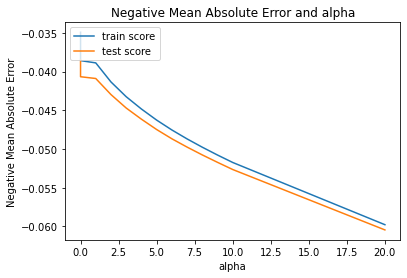

In [331]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [332]:
# Ridge coefficients
alpha = 1.1
ridge = Ridge(alpha=alpha)
ridge.fit(Regularization_Input_Train_Variables, train_housepricedata_output_variable)
ridge.coef_

array([ 0.21842489,  0.28708446,  0.13262139,  0.18651291,  0.21017132,
        0.52517341, -0.08995449,  0.11344824,  0.04132255, -0.1714438 ,
       -0.09990587, -0.07055004, -0.00550536,  0.02494918, -0.03715431,
       -0.01296551,  0.02498487, -0.52553666,  0.04546682,  0.03178464,
       -0.0884113 ,  0.0552633 , -0.06059003, -0.0652963 , -0.0790514 ,
       -0.08028596,  0.09483286,  0.05856437,  0.02583949,  0.02398658])

In [333]:
# R-squared values for train and test from 30 input variables obtain from RFE
y_train_pred = ridge.predict(Regularization_Input_Train_Variables)
print(metrics.r2_score(y_true=train_housepricedata_output_variable, y_pred=y_train_pred))
y_test_pred = ridge.predict(Regularization_Input_Test_Variables)
print(metrics.r2_score(y_true=test_housepricedata_output_variable, y_pred=y_test_pred))

0.8856113362383871
0.8429829304922328


In [334]:
# Ridge model parameters for 30 input variables from RFE
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = Regularization_Input_Train_Variables.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.786),
 ('LotArea', 0.218),
 ('OverallQual', 0.287),
 ('OverallCond', 0.133),
 ('BsmtFinSF1', 0.187),
 ('TotalBsmtSF', 0.21),
 ('GrLivArea', 0.525),
 ('KitchenAbvGr', -0.09),
 ('GarageArea', 0.113),
 ('PoolArea', 0.041),
 ('TotalYearsBuilt', -0.171),
 ('MSZoning_C', -0.1),
 ('Street_Grvl', -0.071),
 ('LandSlope_Gtl', -0.006),
 ('LandSlope_Mod', 0.025),
 ('Condition2_PosN', -0.037),
 ('Condition2_RRAe', -0.013),
 ('RoofStyle_Shed', 0.025),
 ('RoofMatl_ClyTile', -0.526),
 ('RoofMatl_Membran', 0.045),
 ('RoofMatl_Metal', 0.032),
 ('Exterior1st_BrkComm', -0.088),
 ('Foundation_Stone', 0.055),
 ('Foundation_Wood', -0.061),
 ('Electrical_FuseP', -0.065),
 ('Functional_Maj2', -0.079),
 ('Functional_Sev', -0.08),
 ('PoolQC_NA', 0.095),
 ('SaleType_New', 0.059),
 ('SaleCondition_AdjLand', 0.026),
 ('SaleCondition_Normal', 0.024)]

In [335]:
# Chosing top 15 input train variables from 30 Ridge regression coefficients (i.e. input train variables)
Top_input_train_variables_Ridge = train_housepricedata_input_variables[['RoofMatl_ClyTile','GrLivArea','OverallQual','LotArea','TotalBsmtSF','BsmtFinSF1','TotalYearsBuilt','OverallCond','GarageArea','MSZoning_C','PoolQC_NA','KitchenAbvGr','Exterior1st_BrkComm','Functional_Sev','Functional_Maj2']]

# Chosing top 15 input test variables from 30 Ridge regression coefficients (i.e. input test variables)
Top_input_test_variables_Ridge = test_housepricedata_input_variables[['RoofMatl_ClyTile','GrLivArea','OverallQual','LotArea','TotalBsmtSF','BsmtFinSF1','TotalYearsBuilt','OverallCond','GarageArea','MSZoning_C','PoolQC_NA','KitchenAbvGr','Exterior1st_BrkComm','Functional_Sev','Functional_Maj2']]

In [336]:
# model with optimal alpha
# Ridge regression
ridge = Ridge(alpha=1.1)

ridge.fit(Top_input_train_variables_Ridge, train_housepricedata_output_variable)

# R-squared values for train and test from top 15 input variables obtained above from Ridge Regression
y_train_pred = ridge.predict(Top_input_train_variables_Ridge)
print(metrics.r2_score(y_true=train_housepricedata_output_variable, y_pred=y_train_pred))
y_test_pred = ridge.predict(Top_input_test_variables_Ridge)
print(metrics.r2_score(y_true=test_housepricedata_output_variable, y_pred=y_test_pred))

0.8761942555180803
0.8349760485359189


In [337]:
# Ridge model parameters for 15 top input variables obtained above from Ridge Regression
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = Top_input_train_variables_Ridge.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.814),
 ('RoofMatl_ClyTile', -0.513),
 ('GrLivArea', 0.532),
 ('OverallQual', 0.291),
 ('LotArea', 0.216),
 ('TotalBsmtSF', 0.222),
 ('BsmtFinSF1', 0.177),
 ('TotalYearsBuilt', -0.181),
 ('OverallCond', 0.137),
 ('GarageArea', 0.124),
 ('MSZoning_C', -0.102),
 ('PoolQC_NA', 0.081),
 ('KitchenAbvGr', -0.097),
 ('Exterior1st_BrkComm', -0.094),
 ('Functional_Sev', -0.093),
 ('Functional_Maj2', -0.084)]

#################################################################
#### Lasso Regression
#################################################################

In [338]:
lasso = Lasso()
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(Regularization_Input_Train_Variables, train_housepricedata_output_variable) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [339]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.001]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016990,0.003686,0.005997,0.001548,1e-05,{'alpha': 1e-05},-0.043384,-0.042231,-0.034945,-0.033771,...,-0.038787,0.003836,1,-0.033659,-0.035828,-0.035595,-0.035643,-0.034883,-0.035121,0.000799
1,0.009395,0.001356,0.005397,0.000490,0.0001,{'alpha': 0.0001},-0.044399,-0.041721,-0.034417,-0.034339,...,-0.039096,0.004045,2,-0.034756,-0.036830,-0.037520,-0.037262,-0.036089,-0.036491,0.000994
2,0.009198,0.001940,0.005793,0.002133,0.001,{'alpha': 0.001},-0.052750,-0.044856,-0.046264,-0.046426,...,-0.048209,0.003009,3,-0.047722,-0.042500,-0.049780,-0.048843,-0.048404,-0.047450,0.002564


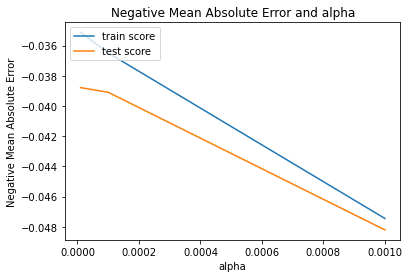

In [340]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [341]:
# Lasso coefficients
alpha = 0.00008
lasso = Lasso(alpha=alpha)

lasso.fit(Regularization_Input_Train_Variables, train_housepricedata_output_variable)
lasso.coef_

array([ 2.65176798e-01,  2.45981112e-01,  1.42938109e-01,  2.45394906e-01,
        2.95685609e-01,  6.34312147e-01, -9.98089094e-02,  8.84076519e-02,
        0.00000000e+00, -1.80153901e-01, -9.70501184e-02, -7.23479737e-02,
        7.24176305e-04,  2.31234223e-02, -5.86497404e-03, -0.00000000e+00,
        0.00000000e+00, -1.28178314e+00,  1.74056388e-02,  0.00000000e+00,
       -8.52609875e-02,  5.11114715e-02, -5.88471541e-02, -3.00169197e-02,
       -7.36832057e-02, -1.01319966e-01,  0.00000000e+00,  6.40770045e-02,
        0.00000000e+00,  2.38665800e-02])

In [342]:
# R-squared values for train and test from 30 input variables obtain from RFE
y_train_pred = lasso.predict(Regularization_Input_Train_Variables)
print(metrics.r2_score(y_true=train_housepricedata_output_variable, y_pred=y_train_pred))
y_test_pred = lasso.predict(Regularization_Input_Test_Variables)
print(metrics.r2_score(y_true=test_housepricedata_output_variable, y_pred=y_test_pred))

0.9071059988284259
0.8323665495655176


In [343]:
# Lasso model parameters for 30 input variables from RFE
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = Regularization_Input_Train_Variables.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.856),
 ('LotArea', 0.265),
 ('OverallQual', 0.246),
 ('OverallCond', 0.143),
 ('BsmtFinSF1', 0.245),
 ('TotalBsmtSF', 0.296),
 ('GrLivArea', 0.634),
 ('KitchenAbvGr', -0.1),
 ('GarageArea', 0.088),
 ('PoolArea', 0.0),
 ('TotalYearsBuilt', -0.18),
 ('MSZoning_C', -0.097),
 ('Street_Grvl', -0.072),
 ('LandSlope_Gtl', 0.001),
 ('LandSlope_Mod', 0.023),
 ('Condition2_PosN', -0.006),
 ('Condition2_RRAe', -0.0),
 ('RoofStyle_Shed', 0.0),
 ('RoofMatl_ClyTile', -1.282),
 ('RoofMatl_Membran', 0.017),
 ('RoofMatl_Metal', 0.0),
 ('Exterior1st_BrkComm', -0.085),
 ('Foundation_Stone', 0.051),
 ('Foundation_Wood', -0.059),
 ('Electrical_FuseP', -0.03),
 ('Functional_Maj2', -0.074),
 ('Functional_Sev', -0.101),
 ('PoolQC_NA', 0.0),
 ('SaleType_New', 0.064),
 ('SaleCondition_AdjLand', 0.0),
 ('SaleCondition_Normal', 0.024)]

In [344]:
# Chosing top 15 input train variables from 30 lasso regression coefficients (i.e. input train variables)
Top_input_train_variables_Lasso = train_housepricedata_input_variables[['RoofMatl_ClyTile','GrLivArea','TotalBsmtSF','LotArea','OverallQual','BsmtFinSF1','TotalYearsBuilt','OverallCond','Functional_Sev','KitchenAbvGr','MSZoning_C','GarageArea','Exterior1st_BrkComm','Functional_Maj2','Street_Grvl']]

# Chosing top 15 input test variables from 30 Lasso regression coefficients (i.e. input test variables)
Top_input_test_variables_Lasso = test_housepricedata_input_variables[['RoofMatl_ClyTile','GrLivArea','TotalBsmtSF','LotArea','OverallQual','BsmtFinSF1','TotalYearsBuilt','OverallCond','Functional_Sev','KitchenAbvGr','MSZoning_C','GarageArea','Exterior1st_BrkComm','Functional_Maj2','Street_Grvl']]


In [345]:
# model with optimal alpha
# Lasso regression
lasso = Lasso(alpha=0.00008)

lasso.fit(Top_input_train_variables_Lasso, train_housepricedata_output_variable)

# R-squared values for train and test from top 15 input variables obtained above from Lasso Regression
y_train_pred = lasso.predict(Top_input_train_variables_Lasso)
print(metrics.r2_score(y_true=train_housepricedata_output_variable, y_pred=y_train_pred))
y_test_pred = lasso.predict(Top_input_test_variables_Lasso)
print(metrics.r2_score(y_true=test_housepricedata_output_variable, y_pred=y_test_pred))

0.8985890064678919
0.8304638390095862


In [346]:
# Lasso model parameters for 15 top input variables obtained above from Lasso Regression
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = Top_input_train_variables_Lasso.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.877),
 ('RoofMatl_ClyTile', -1.256),
 ('GrLivArea', 0.633),
 ('TotalBsmtSF', 0.314),
 ('LotArea', 0.266),
 ('OverallQual', 0.251),
 ('BsmtFinSF1', 0.224),
 ('TotalYearsBuilt', -0.191),
 ('OverallCond', 0.146),
 ('Functional_Sev', -0.129),
 ('KitchenAbvGr', -0.109),
 ('MSZoning_C', -0.088),
 ('GarageArea', 0.104),
 ('Exterior1st_BrkComm', -0.095),
 ('Functional_Maj2', -0.081),
 ('Street_Grvl', -0.066)]

### Output from RFE - 276 input variables to 30 variables

### Output from Lasso regression - 30 variables (from RFE) to 15 variables
<br /> Optimal alpha value: 0.00008
<br /> Lasso regression 30 variables: R-squared (Train) - 0.907 and R-squared (Test) - 0.823
<br /> Lasso regression final 15 input variables: R-squared (Train) - 0.898 and R-squared (Test) - 0.830
### Output from Ridge regression - 30 variables (From RFE) to 15 variables
<br /> Optimal alpha value: 1.1
<br /> Ridge regression 30 variables: R-squared (Train) - 0.885 and R-squared (Test) - 0.842
<br /> Ridge regression final 15 input variables: R-squared (Train) - 0.876 and R-squared (Test) - 0.834
<br />
### Final 15 input variables coefficients and constant coefficient from Lasso regression
<br />'constant', 4.877
<br />'RoofMatl_ClyTile', -1.256
<br />'GrLivArea', 0.633
<br />'TotalBsmtSF', 0.314
<br />'LotArea', 0.266
<br />'OverallQual', 0.251
<br />'BsmtFinSF1', 0.224
<br />'TotalYearsBuilt', -0.191
<br />'OverallCond', 0.146
<br />'Functional_Sev', -0.129
<br />'KitchenAbvGr', -0.109
<br />'MSZoning_C', -0.088
<br />'GarageArea', 0.104
<br />'Exterior1st_BrkComm', -0.095
<br />'Functional_Maj2', -0.081
<br />'Street_Grvl', -0.066
### Final 15 input variables coefficients and constant coefficient from Ridge regression
<br />'constant', 4.814
<br />'RoofMatl_ClyTile', -0.513
<br />'GrLivArea', 0.532
<br />'OverallQual', 0.291
<br />'LotArea', 0.216
<br />'TotalBsmtSF', 0.222
<br />'BsmtFinSF1', 0.177
<br />'TotalYearsBuilt', -0.181
<br />'OverallCond', 0.137
<br />'GarageArea', 0.124
<br />'MSZoning_C', -0.102
<br />'PoolQC_NA', 0.081
<br />'KitchenAbvGr', -0.097
<br />'Exterior1st_BrkComm', -0.094
<br />'Functional_Sev', -0.093
<br />'Functional_Maj2', -0.084